# **Chapter 1**

## Time Series and Machine Learning Primer
> This chapter is an introduction to the basics of machine learning, time series data, and the intersection between the two. This is the Summary of lecture "Machine Learning for Time Series Data in Python", via datacamp.

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

## Timeseries kinds and applications


### Plotting a time series (I)
In this exercise, you'll practice plotting the values of two time series without the time component.

In [297]:
data = pd.read_csv('data.csv', index_col=0)
data2 = pd.read_csv('data2.csv', index_col=0)

In [298]:
# Print the first 5 rows of data
print(data.head(5))

   data_values
0   214.009998
1   214.379993
2   210.969995
3   210.580000
4   211.980005


In [299]:
# Print the first 5 rows of data2
print(data2.head(5))

   data_values
0    -0.006928
1    -0.007929
2    -0.008900
3    -0.009815
4    -0.010653


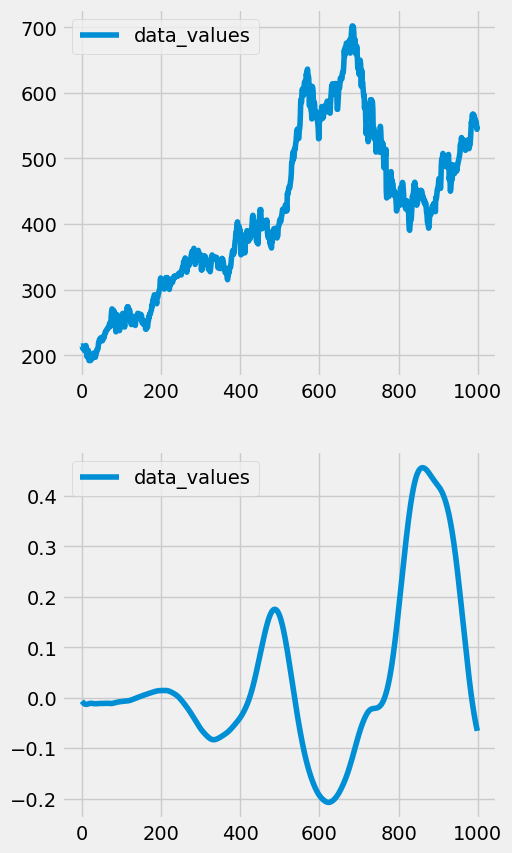

In [300]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(y='data_values', ax=axs[0]);
data2.iloc[:1000].plot(y='data_values', ax=axs[1]);
plt.show()

### Plotting a time series (II)
You'll now plot both the datasets again, but with the included time stamps for each (stored in the column called "time"). Let's see if this gives you some more context for understanding each time series data.

In [301]:
data = pd.read_csv('data_time.csv', index_col=0)
data2 = pd.read_csv('data_time2.csv', index_col=0)

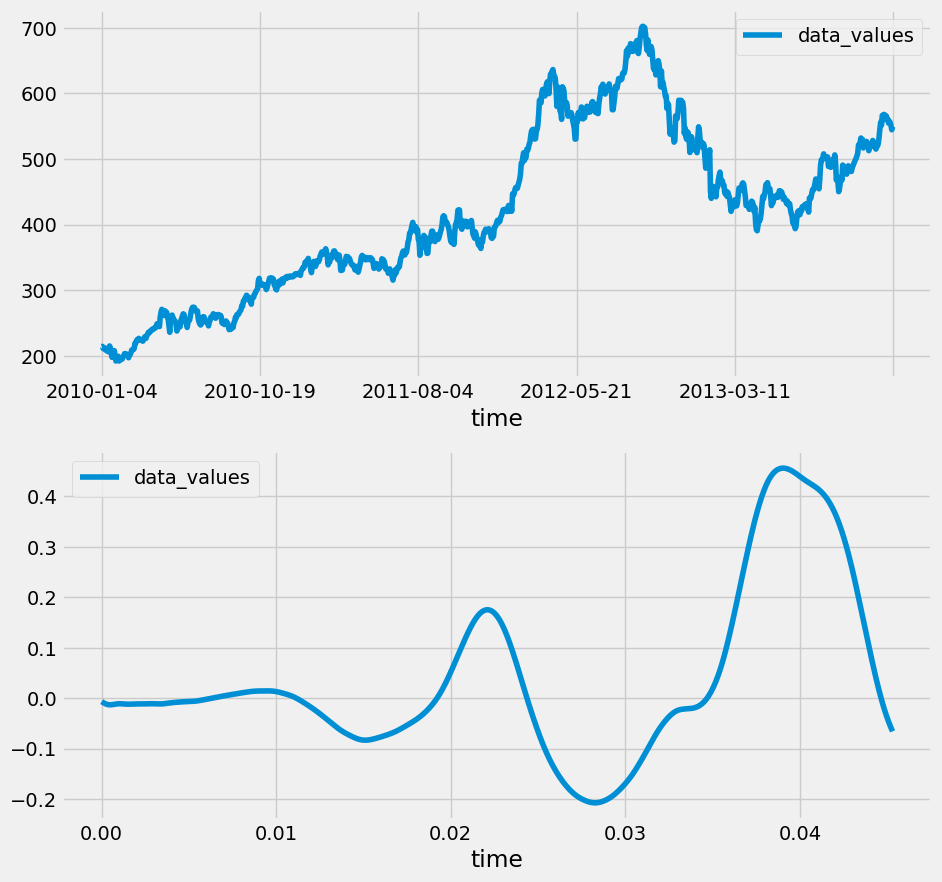

In [302]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(10, 10));
data.iloc[:1000].plot(x='time', y='data_values', ax=axs[0]);
data2.iloc[:1000].plot(x='time', y='data_values', ax=axs[1]);

## Machine Learning Basics
- Preparing data for scikit-learn
    - ```scikit-learn``` expects a particular structure of data: (samples, features)
    - Make sure that your data is at least two-dimensional
    - Make sure the first dimension is samples

In [303]:
data = pd.read_csv('iris_tsa.csv', index_col=0)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


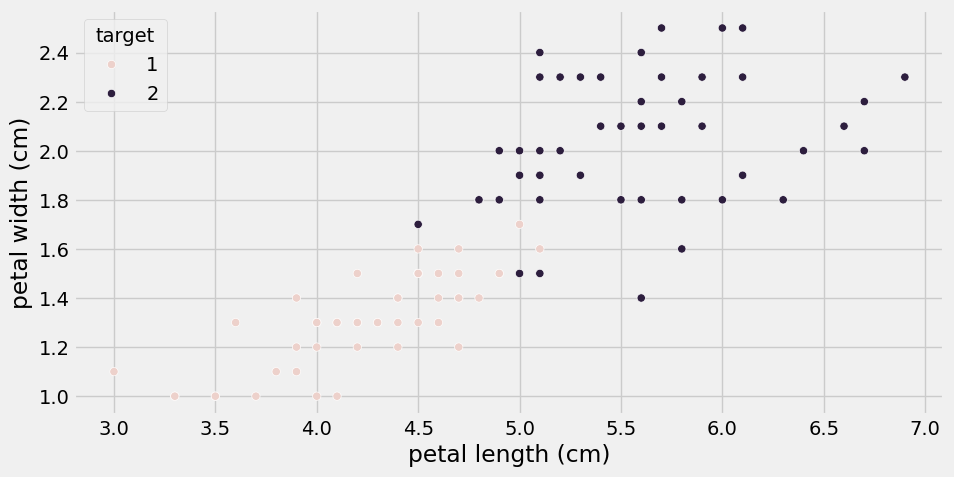

In [304]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='target', data=data);

In [305]:
from sklearn.svm import LinearSVC

# Construct data for the model
X = data[['petal length (cm)', 'petal width (cm)']]
y = data[['target']]

# Fit the model
model = LinearSVC()
model.fit(X, y)

c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

### Predicting using a classification model
Now that you have fit your classifier, let's use it to predict the type of flower (or class) for some newly-collected flowers.

Using the classifier you fit, you'll predict the type of each flower.

In [306]:
targets = pd.read_csv('iris_target.csv', index_col=0)

[2 2 2 1 1 2 2 2 2 1 2 1 1 2 1 1 2 1 2 2]


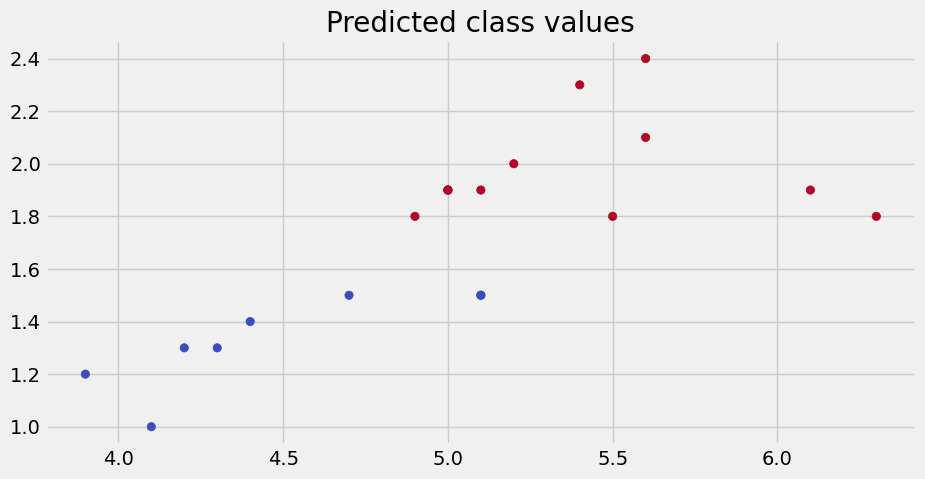

In [307]:
# Create input array
X_predict = targets[['petal length (cm)', 'petal width (cm)']]

# Predict with the model
predictions = model.predict(X_predict)
print(predictions)

# Visualize predictions and actual values
plt.scatter(X_predict['petal length (cm)'], X_predict['petal width (cm)'],
            c=predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show()

### Fitting a simple model: regression
In this exercise, you'll practice fitting a regression model using data from the Boston housing market.

In [308]:
boston = pd.read_csv('boston.csv', index_col=0)

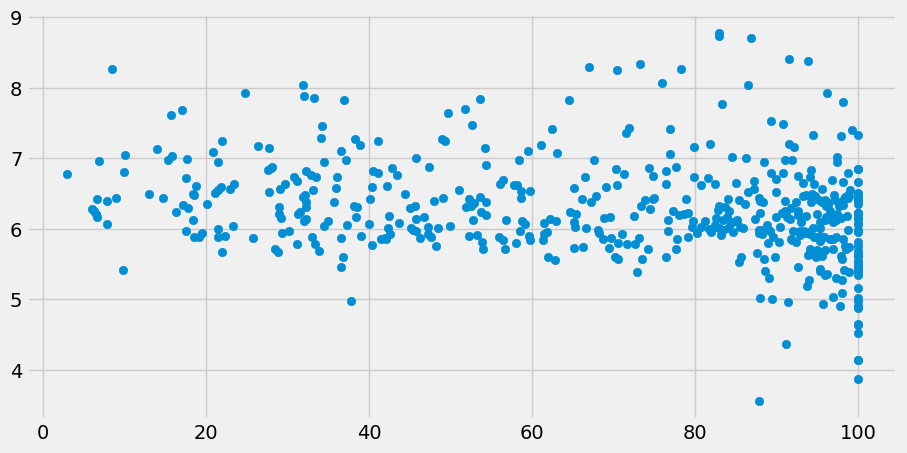

In [309]:
plt.scatter(boston['AGE'], boston['RM']);

In [310]:
from sklearn import linear_model

# Prepare input and output DataFrame
X = boston[['AGE']]
y = boston[['RM']]

# Fit the model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

### Predicting using a regression model
Now that you've fit a model with the Boston housing data, lets see what predictions it generates on some new data. You can investigate the underlying relationship that the model has found between inputs and outputs by feeding in a range of numbers as inputs and seeing what the model predicts for each input.

In [311]:
new_inputs = np.array(pd.read_csv('boston_newinputs.csv', index_col=0, header=None).values)

c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


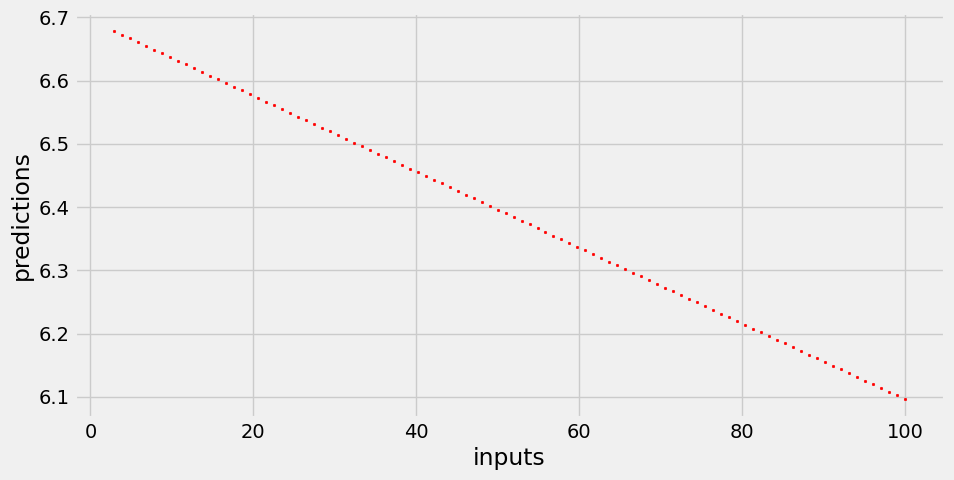

In [312]:
# Generate predictions with the model using those inputs
predictions = model.predict(new_inputs.reshape(-1, 1))

# Visualize the inputs and predicted values
plt.scatter(new_inputs, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()

## Machine learning and time series data


### Inspecting the classification data
In these final exercises of this chapter, you'll explore the two datasets you'll use in this course.

The first is a collection of heartbeat sounds. Hearts normally have a predictable sound pattern as they beat, but some disorders can cause the heart to beat abnormally. This dataset contains a training set with labels for each type of heartbeat, and a testing set with no labels. You'll use the testing set to validate your models.

As you have labeled data, this dataset is ideal for classification. In fact, it was originally offered as a part of a [public Kaggle competition](https://www.kaggle.com/kinguistics/heartbeat-sounds).

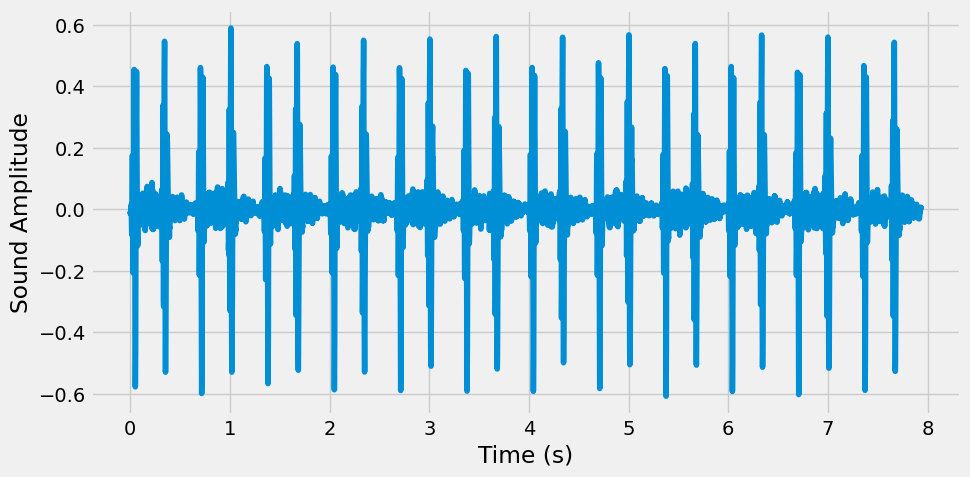

In [313]:
# Import the librosa library and the glob function from the glob library
import librosa as lr
from glob import glob

# Define the path to the directory containing the audio files
data_dir = 'C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\Course-fundamentals-of-Machine-Learning-main\\17. Machine Learning Time Series Python\\files'

# List all the .wav files in the specified folder
audio_files = glob(data_dir + '\\*.wav')

# Read the first audio file, and create the corresponding time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio)) / sfreq

# Create a figure and axes to plot the audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)

# Set labels for the x and y axes
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')

# Show the plot
plt.show()


### Inspecting the regression data
The next dataset contains information about company market value over several years of time. This is one of the most popular kind of time series data used for regression. If you can model the value of a company as it changes over time, you can make predictions about where that company will be in the future. This dataset was also originally provided as part of a [public Kaggle competition](https://www.kaggle.com/dgawlik/nyse).

In this exercise, you'll plot the time series for a number of companies to get an understanding of how they are (or aren't) related to one another.

                  AAPL  FB       NFLX          V        XOM
time                                                       
2010-01-04  214.009998 NaN  53.479999  88.139999  69.150002
2010-01-05  214.379993 NaN  51.510001  87.129997  69.419998
2010-01-06  210.969995 NaN  53.319999  85.959999  70.019997
2010-01-07  210.580000 NaN  52.400001  86.760002  69.800003
2010-01-08  211.980005 NaN  53.300002  87.000000  69.519997


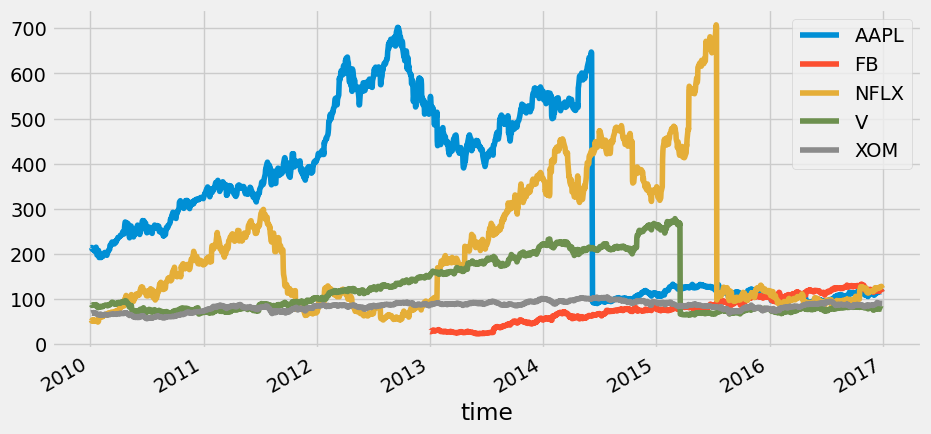

In [314]:
# Read in the data
data = pd.read_csv('prices_nyse.csv', index_col=0)

# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())

# Loop through each column, plot its values over time
fig, ax = plt.subplots()
for column in data.columns:
    data[column].plot(ax=ax, label=column)
ax.legend()
plt.show()

In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1762 non-null   float64
 1   FB      1008 non-null   float64
 2   NFLX    1762 non-null   float64
 3   V       1762 non-null   float64
 4   XOM     1762 non-null   float64
dtypes: float64(5)
memory usage: 82.6 KB


# **Chapter 2**

## Time Series as Inputs to a Model
> The easiest way to incorporate time series into your machine learning pipeline is to use them as features in a model. This chapter covers common features that are extracted from time series in order to do machine learning. This is the Summary of lecture "Machine Learning for Time Series Data in Python", via datacamp.

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

## Classifying a time series


### Many repetitions of sounds
In this exercise, you'll start with perhaps the simplest classification technique: averaging across dimensions of a dataset and visually inspecting the result.

You'll use the heartbeat data described in the last chapter. Some recordings are normal heartbeat activity, while others are abnormal activity. Let's see if you can spot the difference.

Two DataFrames, ```normal``` and ```abnormal```, each with the shape of ```(n_times_points, n_audio_files)``` containing the audio for several heartbeats are available in your workspace.

In [317]:
def show_plot_and_make_titles():
    axs[0, 0].set(title="Normal Heartbeats")
    axs[0, 1].set(title="Abnormal Heartbeats")
    plt.tight_layout()

In [318]:
normal = pd.read_csv('normal_sound.csv', index_col=0)
abnormal = pd.read_csv('abnormal_sound.csv', index_col=0)
sfreq = 2205

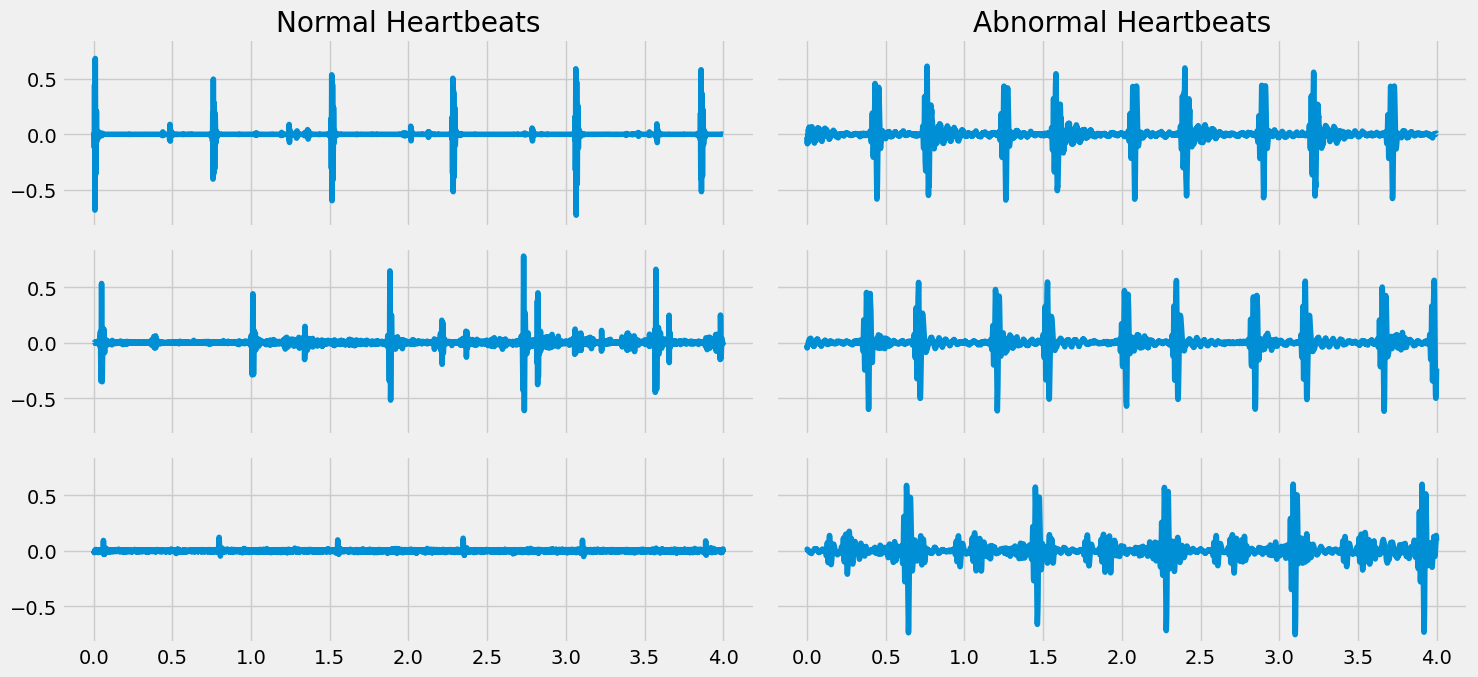

In [319]:
fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)

# Calculate the time array
time = np.arange(len(normal)) / sfreq

# Stack the normal/abnormal audio so you can loop and plot
stacked_audio = np.hstack([normal, abnormal]).T

# Loop through each audio file / ax object and plot
# .T.ravel() transposes the array, then unravels it into a 1-D vector for looping
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time, iaudio)
show_plot_and_make_titles()

### Invariance in time
While you should always start by visualizing your raw data, this is often uninformative when it comes to discriminating between two classes of data points. Data is usually noisy or exhibits complex patterns that aren't discoverable by the naked eye.

Another common technique to find simple differences between two sets of data is to average across multiple instances of the same class. This may remove noise and reveal underlying patterns (or, it may not).

In this exercise, you'll average across many instances of each class of heartbeat sound.

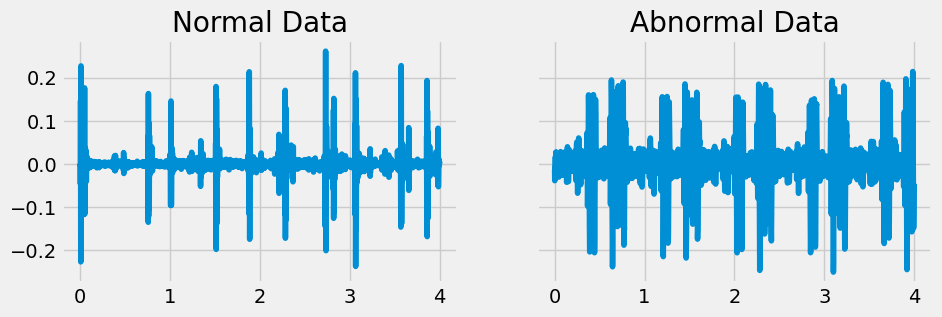

In [320]:
# Average across the audio files of each DataFrame
mean_normal = np.mean(normal, axis=1)
mean_abnormal = np.mean(abnormal, axis=1)

# Plot each average over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax1.plot(time, mean_normal);
ax1.set(title='Normal Data');
ax2.plot(time, mean_abnormal);
ax2.set(title='Abnormal Data');

### Build a classification model
While eye-balling differences is a useful way to gain an intuition for the data, let's see if you can operationalize things with a model. In this exercise, you will use each repetition as a datapoint, and each moment in time as a feature to fit a classifier that attempts to predict abnormal vs. normal heartbeats using only the raw data.

In [321]:
normal = pd.read_csv('heart_normal.csv', index_col=0)
abnormal = pd.read_csv('heart_abnormal.csv', index_col=0)

In [322]:
normal_train_idx = np.random.choice(normal.shape[1], size=22, replace=False).tolist()
normal_test_idx = list(set(np.arange(normal.shape[1]).tolist()) - set(normal_train_idx))

abnormal_train_idx = np.random.choice(abnormal.shape[1], size=20, replace=False).tolist()
abnormal_test_idx = list(set(np.arange(abnormal.shape[1]).tolist()) - set(abnormal_train_idx))

X_train = pd.concat([normal.iloc[:, normal_train_idx], 
                     abnormal.iloc[:, abnormal_train_idx]], axis=1).to_numpy().T
X_test = pd.concat([normal.iloc[:, normal_test_idx], 
                    abnormal.iloc[:, abnormal_test_idx]], axis=1).to_numpy().T

y_train = np.array(['normal'] * len(normal_train_idx) + ['abnormal'] * len(abnormal_train_idx))
y_test = np.array(['normal'] * len(normal_test_idx) + ['abnormal'] * len(abnormal_test_idx))

In [323]:
from sklearn.svm import LinearSVC

# Initialize and fit the model
model = LinearSVC()
model.fit(X_train, y_train)

# Generate predictions and score them manually
predictions = model.predict(X_test)
print(sum(predictions == y_test.squeeze()) / len(y_test))

0.4444444444444444


c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


### Improving features for classification
- The auditory envelope
    - Smooth the data to calculate the auditory envelope
    - Releated to the total amount of audio energy present at each moment of time
- Smoothing over time
    - Instead of averaging over all time, we can do a local average
    - This is called smoothing your timeseries
    - It removes short-term noise, while retaining the general pattern
- Auditory features: The Tempogram
    - We can summarize more complex temporal information with timeseries-specific functions
    - ```librosa``` is a great library for auditory and timeseries feature engineering
    - We can calculate summary statistics of tempo in the same way that we can for the envelope
    

### Calculating the envelope of sound
One of the ways you can improve the features available to your model is to remove some of the noise present in the data. In audio data, a common way to do this is to smooth the data and then rectify it so that the total amount of sound energy over time is more distinguishable. You'll do this in the current exercise.

In [324]:
import librosa as lr

audio, sfreq = lr.load('./files/murmur__201108222238.wav')
time = np.arange(0, len(audio)) / sfreq

audio = pd.DataFrame(audio)

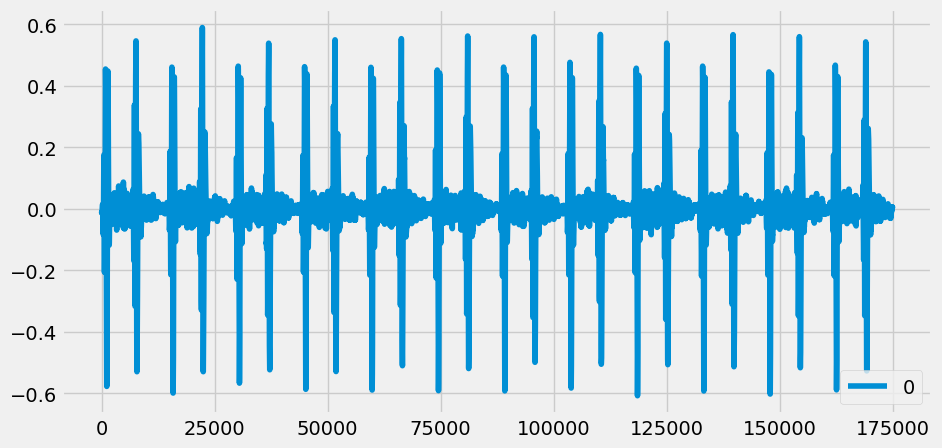

In [325]:
# Plot the raw data first
audio.plot(figsize=(10, 5))
plt.show()

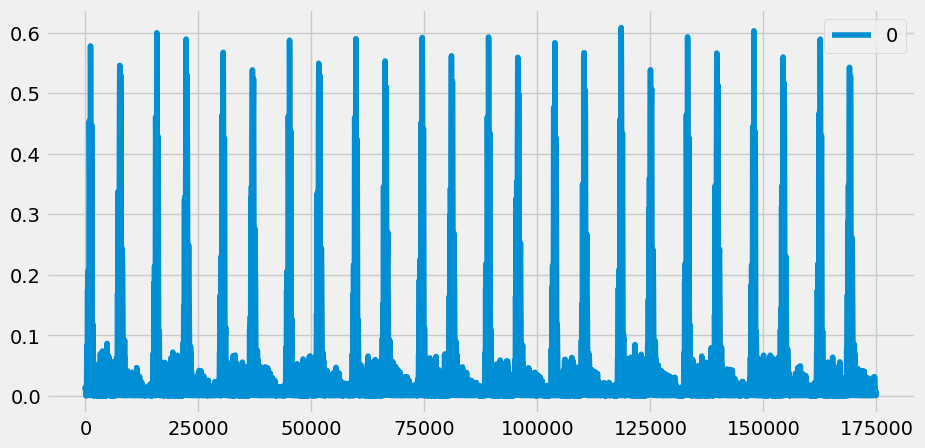

In [326]:
# Rectify the audio signal
audio_rectified = audio.apply(np.abs)

# Plot the result
audio_rectified.plot(figsize=(10, 5))
plt.show()

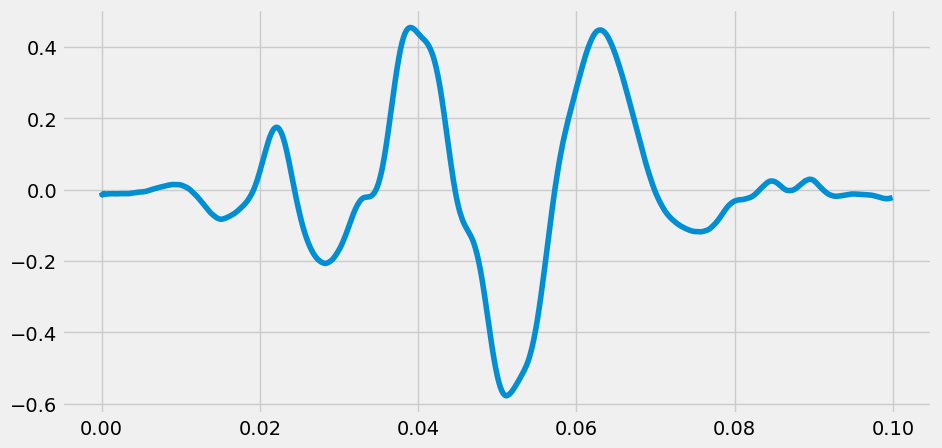

In [327]:
plt.plot(time[:2205], audio[:2205]);

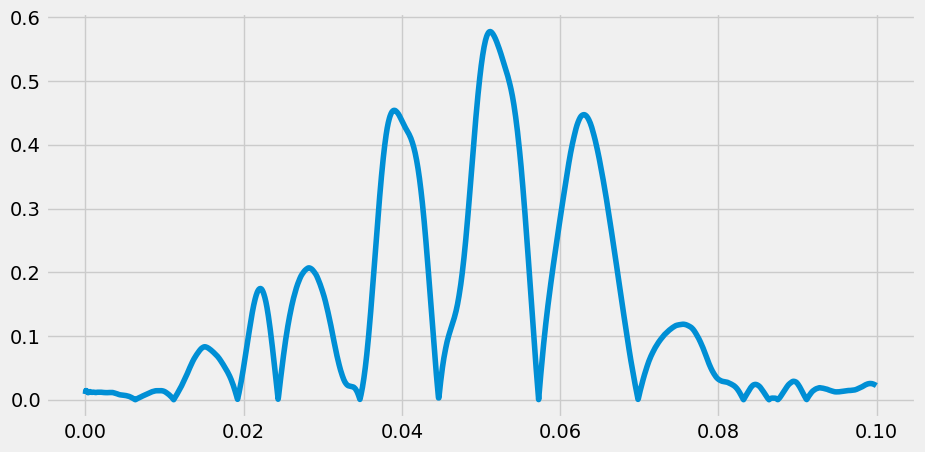

In [328]:
# Rectify the audio signal
audio_rectified = audio.apply(np.abs)

# Plot the result
plt.plot(time[:2205], audio_rectified[:2205]);

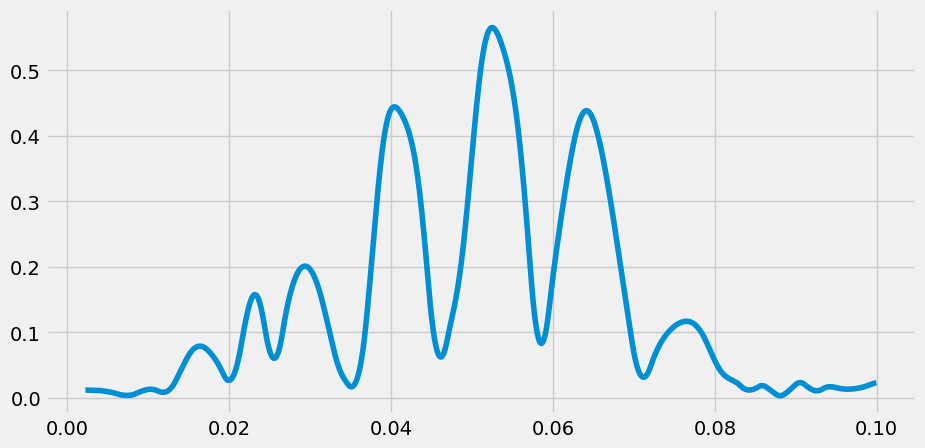

In [329]:
# Smooth by applying a rolling mean
audio_rectified_smooth = audio_rectified.rolling(50).mean()

# Plot the result
plt.plot(time[:2205], audio_rectified_smooth[:2205]);


### Calculating features from the envelope
Now that you've removed some of the noisier fluctuations in the audio, let's see if this improves your ability to classify.

```python
# Calculate stats
means = np.mean(audio_rectified_smooth[:2205], axis=0)
stds = np.std(audio_rectified_smooth[:2205], axis=0)
maxs = np.max(audio_rectified_smooth[:2205], axis=0)

# Create the X and y array
X = np.column_stack([means, stds, maxs])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
from sklearn.model_selection import cross_val_score
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))
```

### Derivative features: The tempogram
One benefit of cleaning up your data is that it lets you compute more sophisticated features. For example, the envelope calculation you performed is a common technique in computing tempo and rhythm features. In this exercise, you'll use ```librosa``` to compute some tempo and rhythm features for heartbeat data, and fit a model once more.

Note that ```librosa``` functions tend to only operate on numpy arrays instead of DataFrames, so we'll access our Pandas data as a Numpy array with the ```.values``` attribute.

In [330]:
audio = pd.read_csv('heart_normal.csv',index_col=0)

```python
# Calculate the tempo of the sounds
tempos = []
for col, i_audio in audio.items():
    tempos.append(lr.beat.tempo(i_audio.values, sr=sfreq, hop_length=2**6, aggregate=None))
    
# Convert the list to an array so you can manipulate it more easily
tempos = np.array(tempos)

# Calculate statistics of each tempo
tempos_mean = tempos.mean(axis=-1)
tempos_std = tempos.std(axis=-1)
tempos_max = tempos.max(axis=-1)
```

```python
# Create the X and y arrays
X = np.column_stack([means, stds, maxs, tempos_mean, tempos_std, tempos_max])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))
```

## The spectrogram
- Fourier transforms
    - Timeseries data can be described as a combination of quickly-changing things and slowly-changing things
    - At each moment in time, we can describe the relative presence of fast- and slow-moving components
    - The simplest way to do this is called a Fourier Transform
    - This converts a single time series into an array that describe the timeseries as a combination of oscillations
- Spectrograms: combinations of windows Fourier transforms
    - A spectrogram is a collection of windowsed Fourier transforms over time
    - Similar to how a rolling mean was calculated:
        - Choose a windows size and shape
        - At a timepoint, calculate the FFT for that window
        - Slide the window over by one
        - Aggregate the results
    - Called a Short-Time Fourier Transform (STFT)
- Spectral feature engineering
    - Each timeseries has a different spectral pattern
    - We can calculate these spectral patterns by analyzing the spectrogram.
    - For example, spectral bandwidth and spectran centroids describe where most of the energy is at each moment in time.

### Spectrograms of heartbeat audio
Spectral engineering is one of the most common techniques in machine learning for time series data. The first step in this process is to calculate a spectrogram of sound. This describes what spectral content (e.g., low and high pitches) are present in the sound over time. In this exercise, you'll calculate a spectrogram of a heartbeat audio file.

In [331]:
audio, sfreq = lr.load('./files/murmur__201108222246.wav')

In [332]:
from librosa.core import stft, amplitude_to_db

# Prepare the STFT
# HOP_LENGTH = 2**4
spec = stft(audio, hop_length=HOP_LENGTH, n_fft=2**7)

# For the test
spec = pd.read_csv('spec.csv', index_col=0)
spec = spec.applymap(complex)
time = np.array(normal.index)
audio = pd.read_csv('audio.csv', index_col=0).to_numpy().squeeze()
sfreq = 2205

C:\Users\yeiso\AppData\Local\Temp\ipykernel_32304\3930358672.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  spec = spec.applymap(complex)


C:\Users\yeiso\AppData\Local\Temp\ipykernel_32304\1563122927.py:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spec_db = amplitude_to_db(spec)


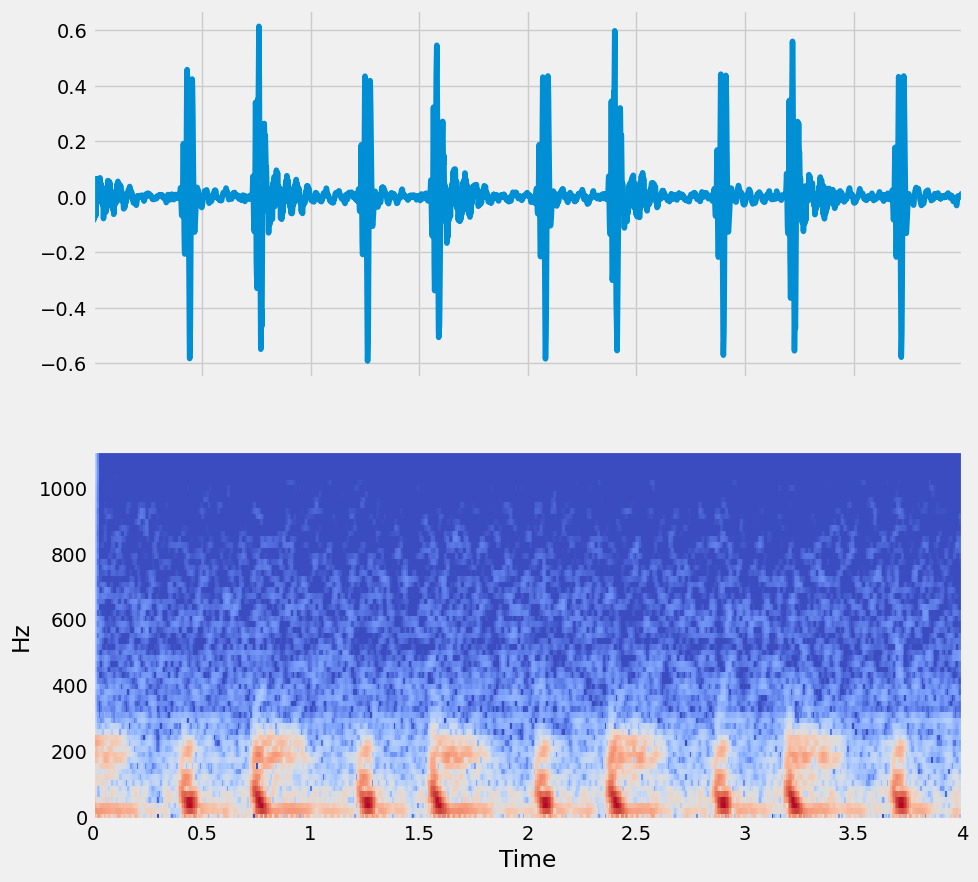

In [333]:
from librosa.display import specshow

# Convert into decibels
spec_db = amplitude_to_db(spec)

# Compare the raw audio to the spectrogram of the audio
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].plot(time,audio)
specshow(spec_db, sr=sfreq, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH);
plt.show()

### Engineering spectral features
As you can probably tell, there is a lot more information in a spectrogram compared to a raw audio file. By computing the spectral features, you have a much better idea of what's going on. As such, there are all kinds of spectral features that you can compute using the spectrogram as a base. In this exercise, you'll look at a few of these features.

In [334]:
spec = np.array(np.abs(spec))

In [335]:
# Calculate the spectral centroid and bandwidth for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=spec)[0]
centroids = lr.feature.spectral_centroid(S=spec)[0]

In [336]:
#hide
times_spec = np.array([ 0.        ,  0.00725624,  0.01451247,  0.02176871,  0.02902494,
        0.03628118,  0.04353741,  0.05079365,  0.05804989,  0.06530612,
        0.07256236,  0.07981859,  0.08707483,  0.09433107,  0.1015873 ,
        0.10884354,  0.11609977,  0.12335601,  0.13061224,  0.13786848,
        0.14512472,  0.15238095,  0.15963719,  0.16689342,  0.17414966,
        0.1814059 ,  0.18866213,  0.19591837,  0.2031746 ,  0.21043084,
        0.21768707,  0.22494331,  0.23219955,  0.23945578,  0.24671202,
        0.25396825,  0.26122449,  0.26848073,  0.27573696,  0.2829932 ,
        0.29024943,  0.29750567,  0.3047619 ,  0.31201814,  0.31927438,
        0.32653061,  0.33378685,  0.34104308,  0.34829932,  0.35555556,
        0.36281179,  0.37006803,  0.37732426,  0.3845805 ,  0.39183673,
        0.39909297,  0.40634921,  0.41360544,  0.42086168,  0.42811791,
        0.43537415,  0.44263039,  0.44988662,  0.45714286,  0.46439909,
        0.47165533,  0.47891156,  0.4861678 ,  0.49342404,  0.50068027,
        0.50793651,  0.51519274,  0.52244898,  0.52970522,  0.53696145,
        0.54421769,  0.55147392,  0.55873016,  0.56598639,  0.57324263,
        0.58049887,  0.5877551 ,  0.59501134,  0.60226757,  0.60952381,
        0.61678005,  0.62403628,  0.63129252,  0.63854875,  0.64580499,
        0.65306122,  0.66031746,  0.6675737 ,  0.67482993,  0.68208617,
        0.6893424 ,  0.69659864,  0.70385488,  0.71111111,  0.71836735,
        0.72562358,  0.73287982,  0.74013605,  0.74739229,  0.75464853,
        0.76190476,  0.769161  ,  0.77641723,  0.78367347,  0.79092971,
        0.79818594,  0.80544218,  0.81269841,  0.81995465,  0.82721088,
        0.83446712,  0.84172336,  0.84897959,  0.85623583,  0.86349206,
        0.8707483 ,  0.87800454,  0.88526077,  0.89251701,  0.89977324,
        0.90702948,  0.91428571,  0.92154195,  0.92879819,  0.93605442,
        0.94331066,  0.95056689,  0.95782313,  0.96507937,  0.9723356 ,
        0.97959184,  0.98684807,  0.99410431,  1.00136054,  1.00861678,
        1.01587302,  1.02312925,  1.03038549,  1.03764172,  1.04489796,
        1.0521542 ,  1.05941043,  1.06666667,  1.0739229 ,  1.08117914,
        1.08843537,  1.09569161,  1.10294785,  1.11020408,  1.11746032,
        1.12471655,  1.13197279,  1.13922902,  1.14648526,  1.1537415 ,
        1.16099773,  1.16825397,  1.1755102 ,  1.18276644,  1.19002268,
        1.19727891,  1.20453515,  1.21179138,  1.21904762,  1.22630385,
        1.23356009,  1.24081633,  1.24807256,  1.2553288 ,  1.26258503,
        1.26984127,  1.27709751,  1.28435374,  1.29160998,  1.29886621,
        1.30612245,  1.31337868,  1.32063492,  1.32789116,  1.33514739,
        1.34240363,  1.34965986,  1.3569161 ,  1.36417234,  1.37142857,
        1.37868481,  1.38594104,  1.39319728,  1.40045351,  1.40770975,
        1.41496599,  1.42222222,  1.42947846,  1.43673469,  1.44399093,
        1.45124717,  1.4585034 ,  1.46575964,  1.47301587,  1.48027211,
        1.48752834,  1.49478458,  1.50204082,  1.50929705,  1.51655329,
        1.52380952,  1.53106576,  1.538322  ,  1.54557823,  1.55283447,
        1.5600907 ,  1.56734694,  1.57460317,  1.58185941,  1.58911565,
        1.59637188,  1.60362812,  1.61088435,  1.61814059,  1.62539683,
        1.63265306,  1.6399093 ,  1.64716553,  1.65442177,  1.661678  ,
        1.66893424,  1.67619048,  1.68344671,  1.69070295,  1.69795918,
        1.70521542,  1.71247166,  1.71972789,  1.72698413,  1.73424036,
        1.7414966 ,  1.74875283,  1.75600907,  1.76326531,  1.77052154,
        1.77777778,  1.78503401,  1.79229025,  1.79954649,  1.80680272,
        1.81405896,  1.82131519,  1.82857143,  1.83582766,  1.8430839 ,
        1.85034014,  1.85759637,  1.86485261,  1.87210884,  1.87936508,
        1.88662132,  1.89387755,  1.90113379,  1.90839002,  1.91564626,
        1.92290249,  1.93015873,  1.93741497,  1.9446712 ,  1.95192744,
        1.95918367,  1.96643991,  1.97369615,  1.98095238,  1.98820862,
        1.99546485,  2.00272109,  2.00997732,  2.01723356,  2.0244898 ,
        2.03174603,  2.03900227,  2.0462585 ,  2.05351474,  2.06077098,
        2.06802721,  2.07528345,  2.08253968,  2.08979592,  2.09705215,
        2.10430839,  2.11156463,  2.11882086,  2.1260771 ,  2.13333333,
        2.14058957,  2.1478458 ,  2.15510204,  2.16235828,  2.16961451,
        2.17687075,  2.18412698,  2.19138322,  2.19863946,  2.20589569,
        2.21315193,  2.22040816,  2.2276644 ,  2.23492063,  2.24217687,
        2.24943311,  2.25668934,  2.26394558,  2.27120181,  2.27845805,
        2.28571429,  2.29297052,  2.30022676,  2.30748299,  2.31473923,
        2.32199546,  2.3292517 ,  2.33650794,  2.34376417,  2.35102041,
        2.35827664,  2.36553288,  2.37278912,  2.38004535,  2.38730159,
        2.39455782,  2.40181406,  2.40907029,  2.41632653,  2.42358277,
        2.430839  ,  2.43809524,  2.44535147,  2.45260771,  2.45986395,
        2.46712018,  2.47437642,  2.48163265,  2.48888889,  2.49614512,
        2.50340136,  2.5106576 ,  2.51791383,  2.52517007,  2.5324263 ,
        2.53968254,  2.54693878,  2.55419501,  2.56145125,  2.56870748,
        2.57596372,  2.58321995,  2.59047619,  2.59773243,  2.60498866,
        2.6122449 ,  2.61950113,  2.62675737,  2.63401361,  2.64126984,
        2.64852608,  2.65578231,  2.66303855,  2.67029478,  2.67755102,
        2.68480726,  2.69206349,  2.69931973,  2.70657596,  2.7138322 ,
        2.72108844,  2.72834467,  2.73560091,  2.74285714,  2.75011338,
        2.75736961,  2.76462585,  2.77188209,  2.77913832,  2.78639456,
        2.79365079,  2.80090703,  2.80816327,  2.8154195 ,  2.82267574,
        2.82993197,  2.83718821,  2.84444444,  2.85170068,  2.85895692,
        2.86621315,  2.87346939,  2.88072562,  2.88798186,  2.8952381 ,
        2.90249433,  2.90975057,  2.9170068 ,  2.92426304,  2.93151927,
        2.93877551,  2.94603175,  2.95328798,  2.96054422,  2.96780045,
        2.97505669,  2.98231293,  2.98956916,  2.9968254 ,  3.00408163,
        3.01133787,  3.0185941 ,  3.02585034,  3.03310658,  3.04036281,
        3.04761905,  3.05487528,  3.06213152,  3.06938776,  3.07664399,
        3.08390023,  3.09115646,  3.0984127 ,  3.10566893,  3.11292517,
        3.12018141,  3.12743764,  3.13469388,  3.14195011,  3.14920635,
        3.15646259,  3.16371882,  3.17097506,  3.17823129,  3.18548753,
        3.19274376,  3.2       ,  3.20725624,  3.21451247,  3.22176871,
        3.22902494,  3.23628118,  3.24353741,  3.25079365,  3.25804989,
        3.26530612,  3.27256236,  3.27981859,  3.28707483,  3.29433107,
        3.3015873 ,  3.30884354,  3.31609977,  3.32335601,  3.33061224,
        3.33786848,  3.34512472,  3.35238095,  3.35963719,  3.36689342,
        3.37414966,  3.3814059 ,  3.38866213,  3.39591837,  3.4031746 ,
        3.41043084,  3.41768707,  3.42494331,  3.43219955,  3.43945578,
        3.44671202,  3.45396825,  3.46122449,  3.46848073,  3.47573696,
        3.4829932 ,  3.49024943,  3.49750567,  3.5047619 ,  3.51201814,
        3.51927438,  3.52653061,  3.53378685,  3.54104308,  3.54829932,
        3.55555556,  3.56281179,  3.57006803,  3.57732426,  3.5845805 ,
        3.59183673,  3.59909297,  3.60634921,  3.61360544,  3.62086168,
        3.62811791,  3.63537415,  3.64263039,  3.64988662,  3.65714286,
        3.66439909,  3.67165533,  3.67891156,  3.6861678 ,  3.69342404,
        3.70068027,  3.70793651,  3.71519274,  3.72244898,  3.72970522,
        3.73696145,  3.74421769,  3.75147392,  3.75873016,  3.76598639,
        3.77324263,  3.78049887,  3.7877551 ,  3.79501134,  3.80226757,
        3.80952381,  3.81678005,  3.82403628,  3.83129252,  3.83854875,
        3.84580499,  3.85306122,  3.86031746,  3.8675737 ,  3.87482993,
        3.88208617,  3.8893424 ,  3.89659864,  3.90385488,  3.91111111,
        3.91836735,  3.92562358,  3.93287982,  3.94013605,  3.94739229,
        3.95464853,  3.96190476,  3.969161  ,  3.97641723,  3.98367347,
        3.99092971,  3.99818594])

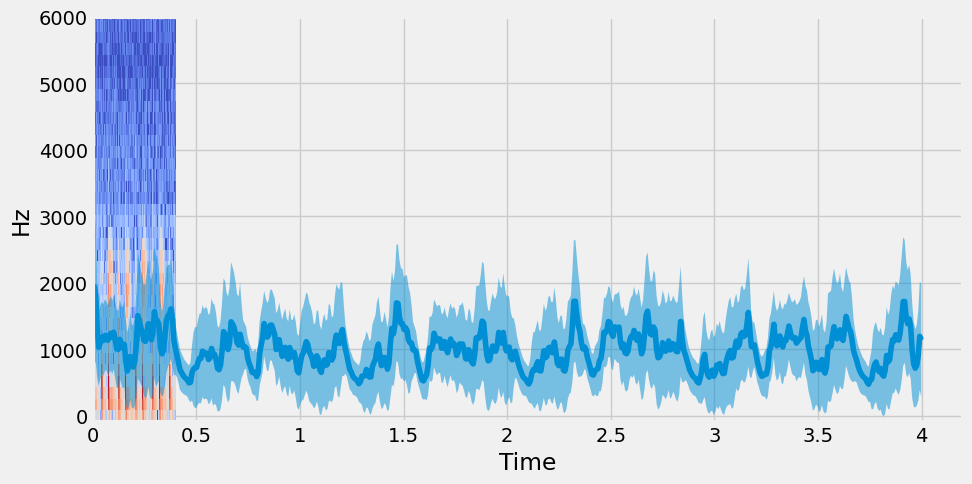

<Figure size 1000x500 with 0 Axes>

In [337]:
from librosa.core import amplitude_to_db
from librosa.display import specshow

# Convert spectrogram to decibels for visualization
spec_db = amplitude_to_db(spec)

# Display these features on top of the spectrogram
fig, ax = plt.subplots(figsize=(10, 5))
specshow(spec_db, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH, ax=ax)
ax.plot(times_spec, centroids)
ax.fill_between(times_spec, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5)
ax.set(ylim=[None, 6000])
plt.show()
plt.savefig('spectrogram_centroid.png')

### Combining many features in a classifier

You've spent this lesson engineering many features from the audio data - some contain information about how the audio changes in time, others contain information about the spectral content that is present.

The beauty of machine learning is that it can handle all of these features at the same time. If there is different information present in each feature, it should improve the classifier's ability to distinguish the types of audio. Note that this often requires more advanced techniques such as regularization, which we'll cover in the next chapter.

For the final exercise in the chapter, we've loaded many of the features that you calculated before. Combine all of them into an array that can be fed into the classifier, and see how it does.

```python
# Loop through each spectrogram
bandwidths = []
centroids = []

for spec in spectrograms:
    # Calculate the mean spectral bandwidth
    this_mean_bandwidth = np.mean(lr.feature.spectral_bandwidth(S=spec))
    # Calculate the mean spectral centroid
    this_mean_centroid = np.mean(lr.feature.spectral_centroid(S=spec))
    # Collect the values
    bandwidths.append(this_mean_bandwidth)  
    centroids.append(this_mean_centroid)
```

```python
# Create the X and y arrays
X = np.column_stack([means, stds, maxs, tempo_mean, tempo_max, tempo_std, bandwidths, centroids])
y = labels.reshape(-1, 1)

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))
```

# **Chapter 3**

## Predicting Time Series Data
> If you want to predict patterns from data over time, there are special considerations to take in how you choose and construct your model. This chapter covers how to gain insights into the data before fitting your model, as well as best-practices in using predictive modeling for time series data. This is the Summary of lecture "Machine Learning for Time Series Data in Python", via datacamp.

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

## Predicting data over time
- Correlation and regression
    - Regression is similar to calculating correlation, with some key differences
        - Regression: A process that results in a formal model of the data
        - Correlation: A statistic that describes the data. Less information than regression model
- Correlation between variables often changes over time
    - Time series often have patterns that change over time
    - Two timeseries that seem correlated at one moment may not remain so over time.
- Scoring regression models
    - Two most common methods:
        - Correlation ($r$)
        - Coefficient of Determination ($R^2$)
            - The value of $R^2$ is bounded on the top by 1, and can be infinitely low
            - Values closer to 1 mean the model does a better jot of predicting outputs \
       $1 - \frac{\text{error}(model)}{\text{variance}(testdata)}$

In [339]:
prices = pd.read_csv('tsa_prices.csv', index_col='date', parse_dates=True)
prices.head()

,EBAY,YHOO
date,,
2010-01-04,23.900000,17.100000
2010-01-05,23.650000,17.230000
2010-01-06,23.500000,17.170000
2010-01-07,23.229998,16.700001
2010-01-08,23.509999,16.700001


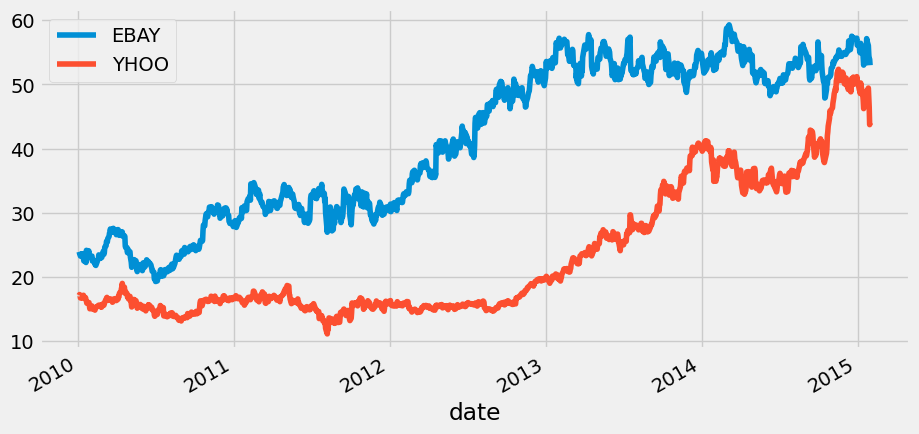

In [340]:
# Plot the raw values over time
prices.plot()
plt.show()

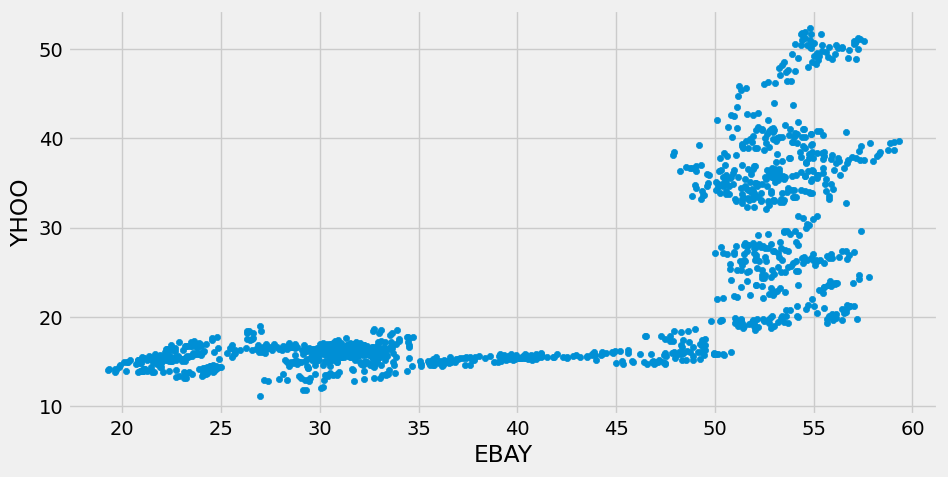

In [341]:
# Scatterplot with one company per axis
prices.plot.scatter('EBAY', 'YHOO');
plt.show()

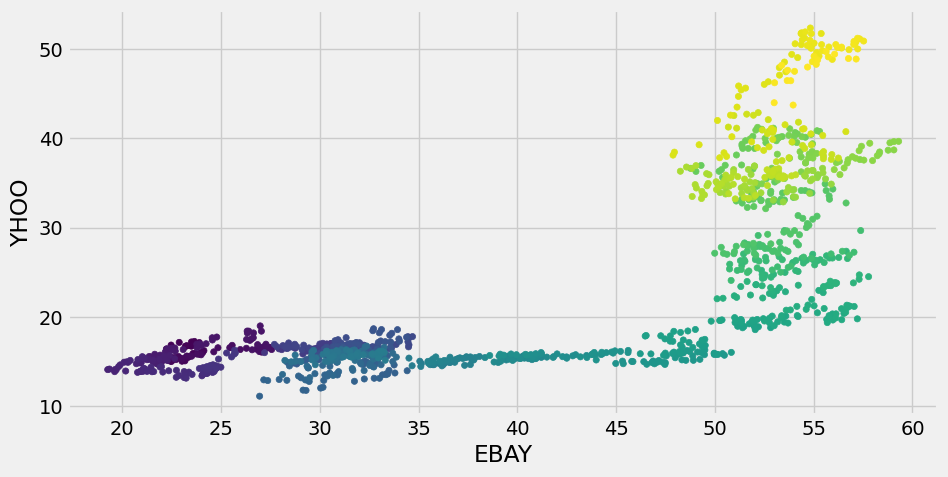

In [342]:
# Scatterplot with color relating to time
prices.plot.scatter('EBAY', 'YHOO', c=prices.index, cmap=plt.cm.viridis, colorbar=False);
plt.show()

### Fitting a simple regression model
Now we'll look at a larger number of companies. Recall that we have historical price values for many companies. Let's use data from several companies to predict the value of a test company. You'll attempt to predict the value of the Apple stock price using the values of NVidia, Ebay, and Yahoo. Each of these is stored as a column in the all_prices DataFrame. Below is a mapping from company name to column name:
```
ebay: "EBAY"
nvidia: "NVDA"
yahoo: "YHOO"
apple: "AAPL"
```
We'll use these columns to define the input/output arrays in our model.

In [343]:
all_prices = pd.read_csv('all_prices.csv', index_col=0, parse_dates=True)
all_prices.head()

,AAPL,ABT,AIG,AMAT,ARNC,BAC,BSX,C,CHK,CMCSA,...,QCOM,RF,SBUX,T,V,VZ,WFC,XOM,XRX,YHOO
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,214.009998,54.459951,29.889999,14.30,16.650013,15.690000,9.01,3.40,28.090001,16.969999,...,46.939999,5.42,23.049999,28.580000,88.139999,33.279869,27.320000,69.150002,8.63,17.100000
2010-01-05,214.379993,54.019953,29.330000,14.19,16.130013,16.200001,9.04,3.53,28.970002,16.740000,...,48.070000,5.60,23.590000,28.440001,87.129997,33.339868,28.070000,69.419998,8.64,17.230000
2010-01-06,210.969995,54.319953,29.139999,14.16,16.970013,16.389999,9.16,3.64,28.650002,16.620001,...,47.599998,5.67,23.420000,27.610001,85.959999,31.919873,28.110001,70.019997,8.56,17.170000
2010-01-07,210.580000,54.769952,28.580000,14.01,16.610014,16.930000,9.09,3.65,28.720002,16.969999,...,48.980000,6.17,23.360001,27.299999,86.760002,31.729875,29.129999,69.800003,8.60,16.700001
2010-01-08,211.980005,55.049952,29.340000,14.55,17.020014,16.780001,9.00,3.59,28.910002,16.920000,...,49.470001,6.18,23.280001,27.100000,87.000000,31.749874,28.860001,69.519997,8.57,16.700001


In [344]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Use stock symbols to extract training data
X = all_prices[['EBAY', 'NVDA', 'YHOO']]
y = all_prices[['AAPL']]

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[-6.09050633 -0.3179172  -3.72957284]


### Visualizing predicted values
When dealing with time series data, it's useful to visualize model predictions on top of the "actual" values that are used to test the model.

In this exercise, after splitting the data (stored in the variables ```X``` and ```y```) into training and test sets, you'll build a model and then visualize the model's predictions on top of the testing data in order to estimate the model's performance.

In [345]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                   shuffle=False, random_state=1)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

-0.3380697256228944


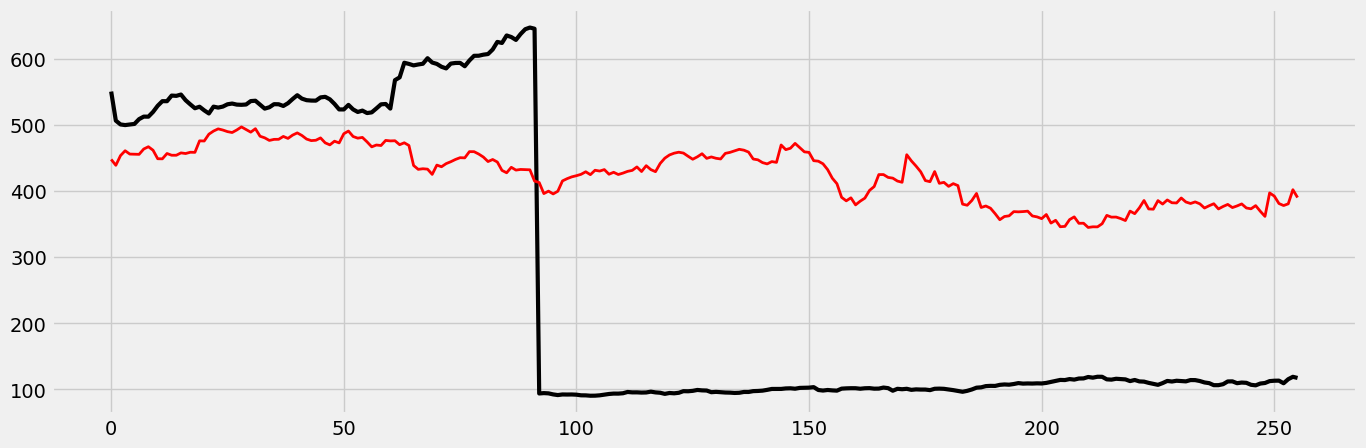

In [346]:
# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(range(len(y_test)), y_test, color='k', lw=3);
ax.plot(range(len(predictions)), predictions, color='r', lw=2);

## Advanced time series prediction
- Data is messy
    - Real-world data is often messy
    - The two most common problems are missing data and outliers
    - This often happens because of human error, machine error malfunction, database failure, etc..
    - Visualizing your raw data makes it easier to spot these problems
- Interpolation: using time to fill in missing data
    - A common way to deal with missing data is to interpolate missing values
    - With timeseries data, you can use time to assist in interpolation.
    - In this case, interpolation means using the known values on either side of a gap in the data to make assumptions about what's missing
- Using a rolling window to transform data
    - Another common use of rolling windows is to transform the data
- Finding outliers in your data
    - Outliers are datapoints that are significantly statistically different from the dataset.
    - They can have negative effects on the predictive power of your model, biasing it away from its "true" value
    - One solution is to remove or replace outliers with a more representative value
> Note: Be very careful about doing this - often it is difficult to determine what is a legitimately extreme value vs an abberation.

### Visualizing messy data
Let's take a look at a new dataset - this one is a bit less-clean than what you've seen before.

As always, you'll first start by visualizing the raw data. Take a close look and try to find datapoints that could be problematic for fitting models.

In [347]:
prices = pd.read_csv('prices_null.csv', index_col=0, parse_dates=True)

EBAY    273
NVDA    502
YHOO    232
dtype: int64


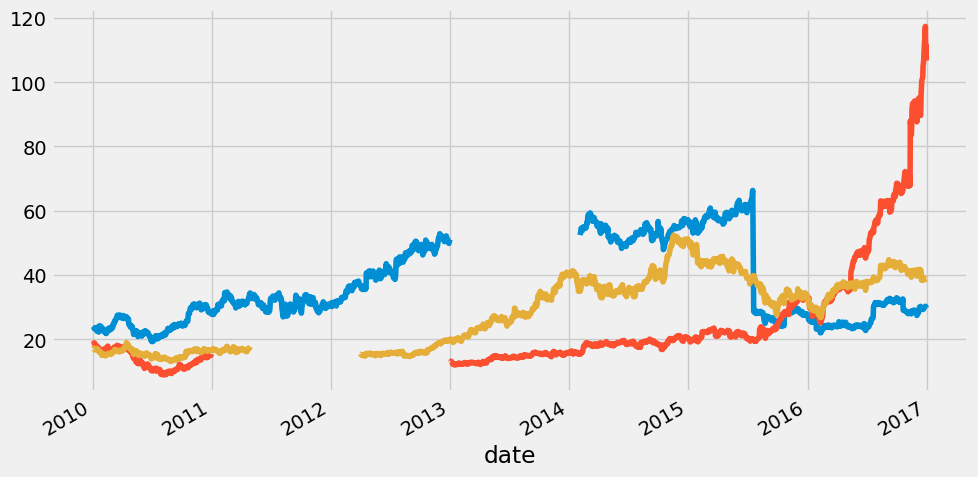

In [348]:
# Visualize the dataset
prices.plot(legend=False);
plt.tight_layout();

# Count the missing values of each time series
missing_values = prices.isnull().sum()
print(missing_values)
plt.show()

### Imputing missing values
When you have missing data points, how can you fill them in?

In this exercise, you'll practice using different interpolation methods to fill in some missing values, visualizing the result each time. But first, you will create the function (```interpolate_and_plot()```) you'll use to interpolate missing data points and plot them.

In [349]:
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(prices, interpolation):
    
    # Create a boolean mask for missing values
    missing_values = prices.isna()
    
    # Interpolate the missing values
    prices_interp = prices.interpolate(interpolation)
    
    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    prices_interp.plot(color='k', alpha=0.6, ax=ax, legend=False);
    
    # Note plot the interpolated values on top in red
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False);

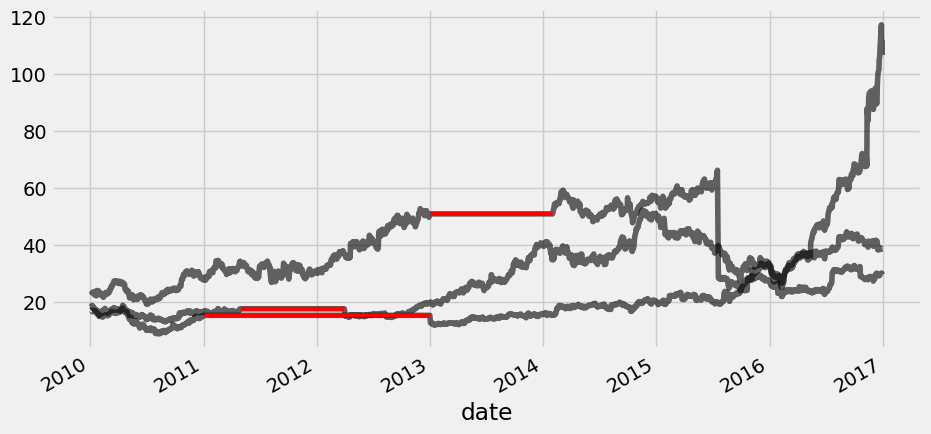

In [350]:
# Interpolate using the latest non-missing value
interpolation_type = 'zero'
interpolate_and_plot(prices, interpolation_type)

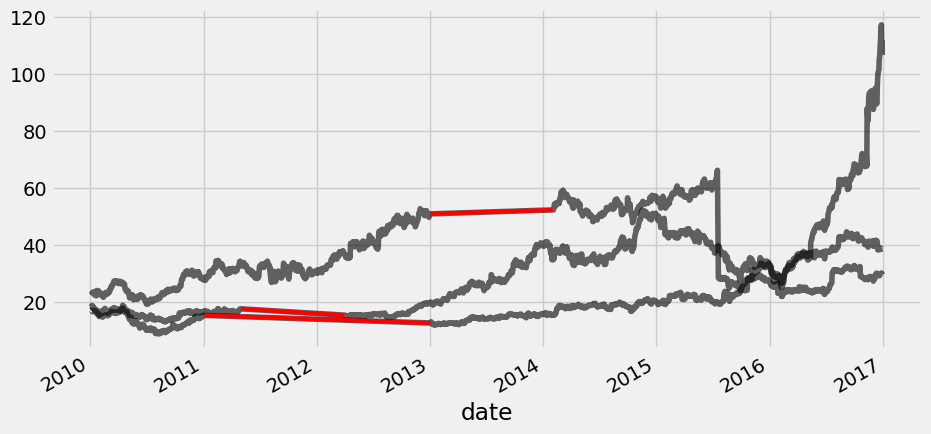

In [351]:
# Interpolate using the latest non-missing value
interpolation_type = 'linear'
interpolate_and_plot(prices, interpolation_type)

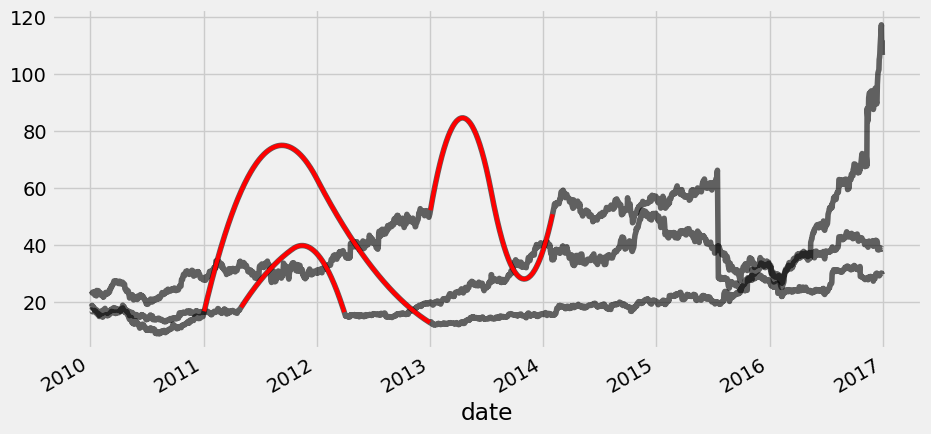

In [352]:
# Interpolate with a quadratic function
interpolation_type = 'quadratic'
interpolate_and_plot(prices, interpolation_type)

### Transforming raw data
In the last chapter, you calculated the rolling mean. In this exercise, you will define a function that calculates the percent change of the latest data point from the mean of a window of previous data points. This function will help you calculate the percent change over a rolling window.

This is a more stable kind of time series that is often useful in machine learning.

C:\Users\yeiso\AppData\Local\Temp\ipykernel_32304\616886804.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_value = series[-1]


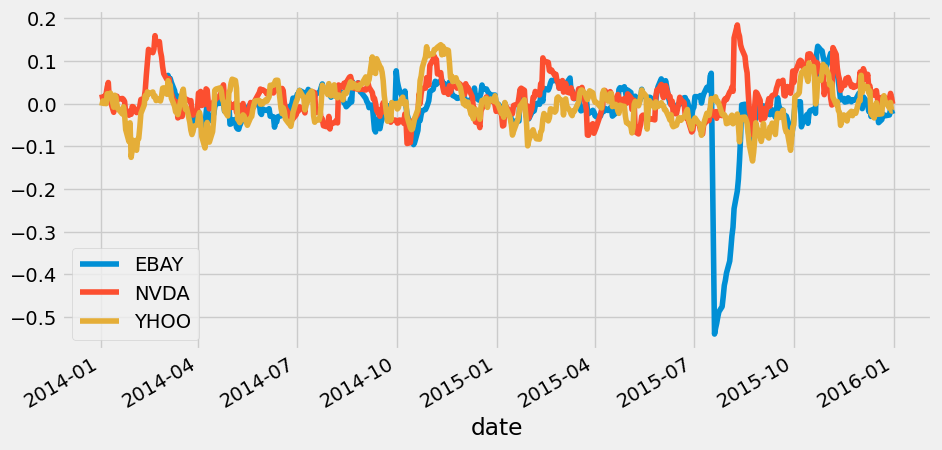

In [353]:
# Your custom function
def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
    previous_values = series[:-1]
    last_value = series[-1]
    
    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

# Apply your custom function and plot
prices_perc = prices.rolling(20).apply(percent_change)
prices_perc.loc["2014":"2015"].plot();

### Handling outliers
In this exercise, you'll handle outliers - data points that are so different from the rest of your data, that you treat them differently from other "normal-looking" data points. You'll use the output from the previous exercise (percent change over time) to detect the outliers. First you will write a function that replaces outlier data points with the median value from the entire time series.

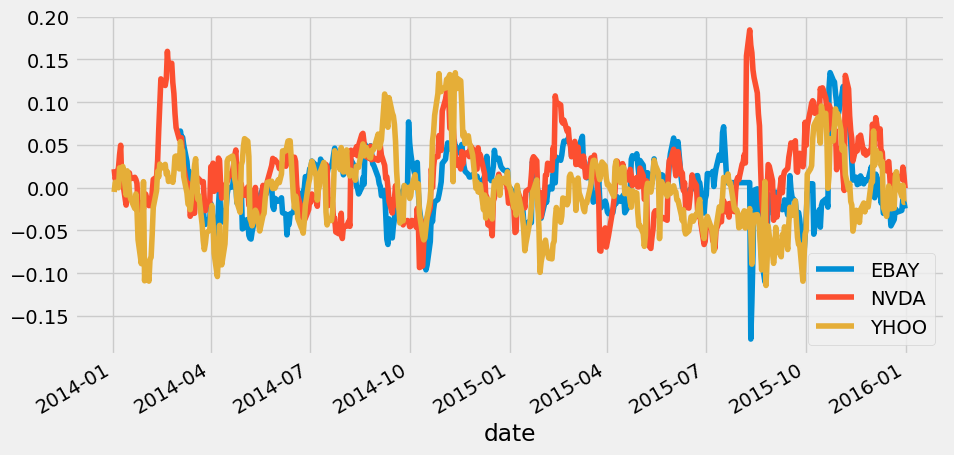

In [354]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the difference that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median across the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing functino to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot();

## Creating features over time
- Calculating "date-based" features
    - Thus far we've focused on calculating "statistical" features - these are features that correspond statistical properties of the data, like "mean" , "standard deviation", etc
    - However, don't forget the timeseries data oftenhas more "human" features associated with it, like days of the week, holidays, etc.
    - These features are often useful when dealing with timeseries data that spans multiple years (such as stock value over time)

### Engineering multiple rolling features at once
Now that you've practiced some simple feature engineering, let's move on to something more complex. You'll calculate a collection of features for your time series data and visualize what they look like over time. This process resembles how many other time series models operate.

C:\Users\yeiso\AppData\Local\Temp\ipykernel_32304\1490490851.py:8: FutureWarning: The provided callable <function min at 0x00000214679C2AC0> is currently using Rolling.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  features = prices_perc_rolling.aggregate(features_to_calculate)
C:\Users\yeiso\AppData\Local\Temp\ipykernel_32304\1490490851.py:8: FutureWarning: The provided callable <function max at 0x00000214679C2980> is currently using Rolling.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  features = prices_perc_rolling.aggregate(features_to_calculate)
C:\Users\yeiso\AppData\Local\Temp\ipykernel_32304\1490490851.py:8: FutureWarning: The provided callable <function mean at 0x00000214679C3380> is currently using Rolling.mean. In a future version of pandas, the provided callable will be used directly. To keep

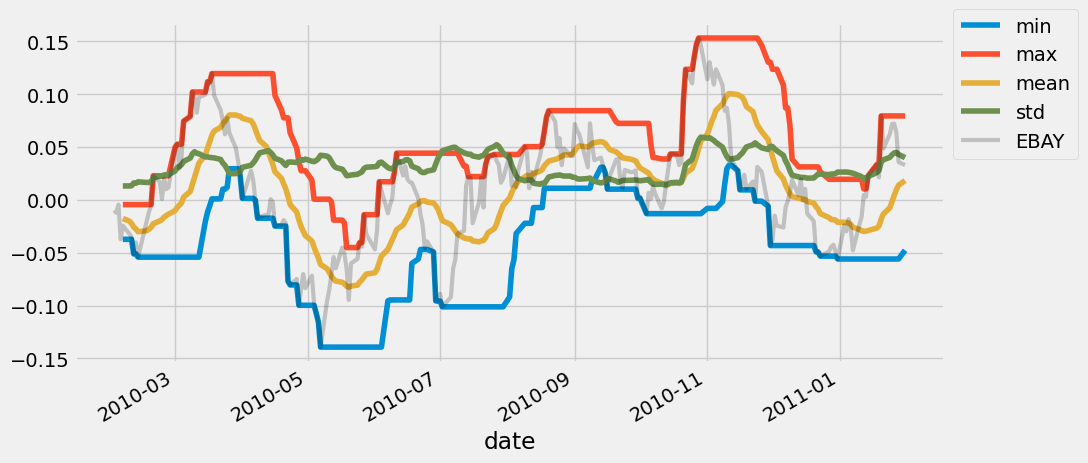

In [355]:
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
prices_perc_rolling = prices_perc['EBAY'].rolling(20, min_periods=5, closed='right')

# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

# Calculate these features for your rolling window object
features = prices_perc_rolling.aggregate(features_to_calculate)

# Plot the results
ax = features.loc[:"2011-01"].plot();
prices_perc['EBAY'].loc[:"2011-01"].plot(ax=ax, color='k', alpha=0.2, lw=3);
ax.legend(loc=(1.01, 0.6));

### Percentiles and partial functions
In this exercise, you'll practice how to pre-choose arguments of a function so that you can pre-configure how it runs. You'll use this to calculate several percentiles of your data using the same ```percentile()``` function in numpy.

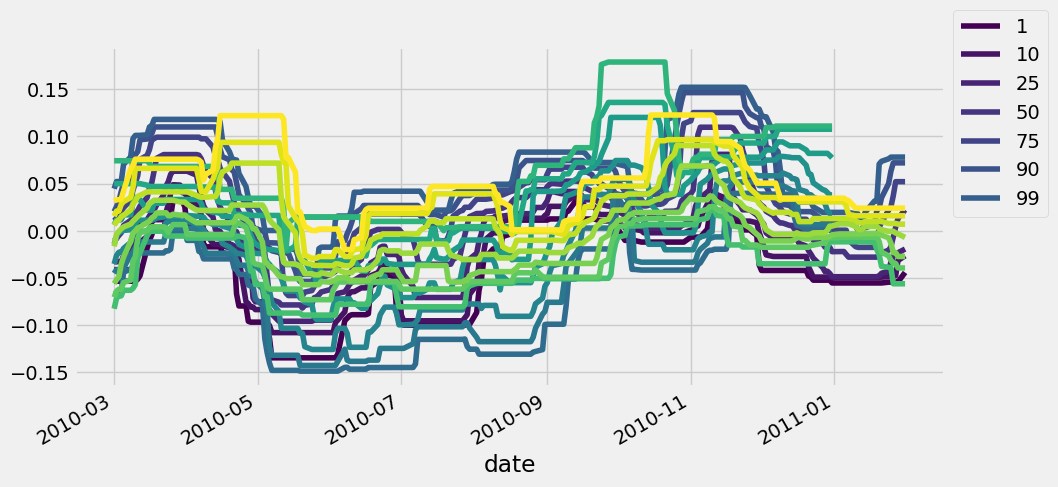

<Figure size 1000x500 with 0 Axes>

In [356]:
# Import partial from functools
from functools import partial

percentiles = [1, 10, 25, 50, 75, 90, 99]

# Use a list comprehension to create a partial function for each quantile
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')
features_percentiles = prices_perc_rolling.aggregate(percentile_functions)

# Plot a subset of the result
ax = features_percentiles.loc[:"2011-01"].plot(cmap=plt.cm.viridis)
ax.legend(percentiles, loc=(1.01, .5))
plt.show()

plt.savefig('price_percentile.png')

### Using "date" information
It's easy to think of timestamps as pure numbers, but don't forget they generally correspond to things that happen in the real world. That means there's often extra information encoded in the data such as "is it a weekday?" or "is it a holiday?". This information is often useful in predicting timeseries data.

In [357]:
# Extract date features from the data, add them as columns
prices_perc['day_of_week'] = prices_perc.index.dayofweek
prices_perc['week_of_year'] = prices_perc.index.weekofyear
prices_perc['month_of_year'] = prices_perc.index.month

# Print prices_perc
print(prices_perc)

AttributeError: 'DatetimeIndex' object has no attribute 'weekofyear'

# **Chapter 4**

## Validating and Inspecting Time Series Models
> Once you've got a model for predicting time series data, you need to decide if it's a good or a bad model. This chapter coves the basics of generating predictions with models in order to validate them against "test" data. This is the Summary of lecture "Machine Learning for Time Series Data in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Time_Series_Analysis, Machine_Learning]
- image: images/lag_difference.png

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
# plt.style.use('fivethirtyeight')
plt.rcParams['image.cmap'] = 'inferno'

## Creating features from the past
- The past is useful
    - Timeseries data almost always have information that is shared between timepoints
    - Information in the past can help predict what happens in the future
    - Often the features best-suited to predict a timeseries are previous values of the same timeseries
- A note on smoothness and auto-correlation
    - A common question to ask of a timeseries: how smooth is the data.
    - AKA, how correlated is a timepoint with its neighboring timepoints (called **autocorrelation**)
    - The amount of auto-correlation in data will impact your models.

### Creating time-shifted features
In machine learning for time series, it's common to use information about previous time points to predict a subsequent time point.

In this exercise, you'll "shift" your raw data and visualize the results. You'll use the percent change time series that you calculated in the previous chapter, this time with a very short window. A short window is important because, in a real-world scenario, you want to predict the day-to-day fluctuations of a time series, not its change over a longer window of time.

In [ ]:
prices = pd.read_csv('./dataset/prices_nyse.csv', index_col=0, parse_dates=True)
prices = prices[['AAPL']]

# Your custom function
def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
    previous_values = series[:-1]
    last_value = series[-1]
    
    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the difference that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median across the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your custom function and plot
prices_perc = prices.rolling(20).apply(percent_change)

# Apply your preprocessing functino to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)

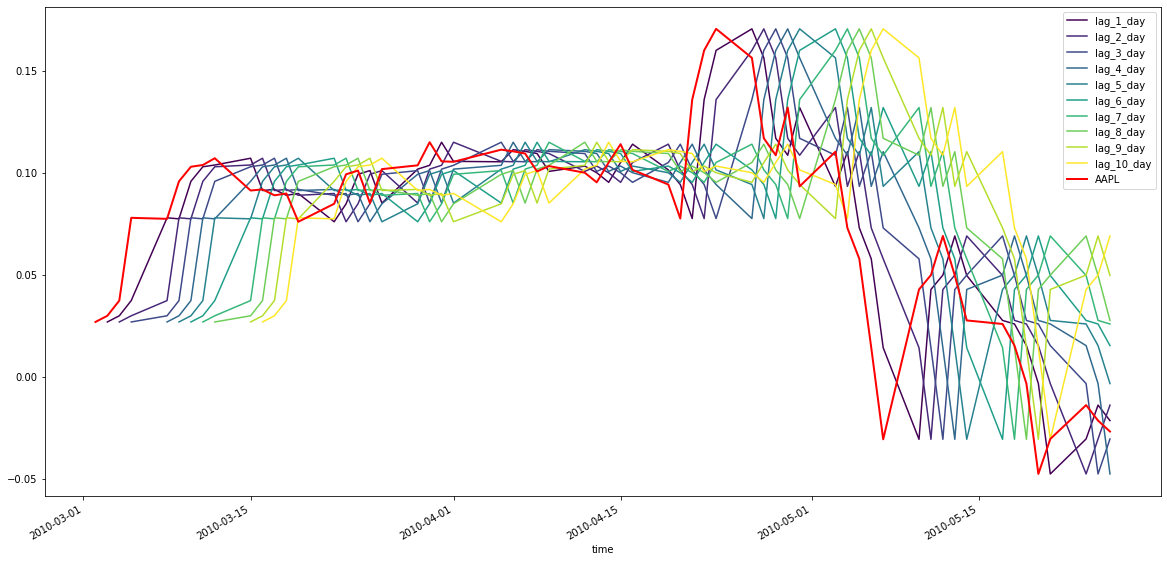

In [ ]:
# These are the "time lags"
shifts = np.arange(1, 11).astype(int)

# Use a dictionary comprehension to create name: value pairs, one pair per shift
shifted_data = {"lag_{}_day".format(day_shift): 
                prices_perc['AAPL'].shift(day_shift) for day_shift in shifts}

# Convert into a DataFrame for subsequent use
prices_perc_shifted = pd.DataFrame(shifted_data)

# Plot the first 100 samples of each
fig, ax = plt.subplots(figsize=(20, 10));
prices_perc_shifted.iloc[:100].plot(cmap=plt.cm.viridis, ax=ax);
prices_perc.iloc[:100].plot(color='r', lw=2, ax=ax);
ax.legend(loc='best');
plt.savefig('../images/lag_difference.png')

### Special case: Auto-regressive models
Now that you've created time-shifted versions of a single time series, you can fit an auto-regressive model. This is a regression model where the input features are time-shifted versions of the output time series data. You are using previous values of a timeseries to predict current values of the same timeseries (thus, it is auto-regressive).

By investigating the coefficients of this model, you can explore any repetitive patterns that exist in a timeseries, and get an idea for how far in the past a data point is predictive of the future.

In [ ]:
from sklearn.linear_model import Ridge

# Replace missing values with the median for each column
X = prices_perc_shifted.fillna(np.nanmedian(prices_perc_shifted))
y = prices_perc['AAPL'].fillna(np.nanmedian(prices_perc['AAPL']))

# Fit the model
model = Ridge()
model.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### Visualize regression coefficients
Now that you've fit the model, let's visualize its coefficients. This is an important part of machine learning because it gives you an idea for how the different features of a model affect the outcome.

In this exercise, you will create a function that, given a set of coefficients and feature names, visualizes the coefficient values.


In [ ]:
def visualize_coefficients(coefs, names, ax):
    # Make a bar plot for the coefficients, including their names on the x-axis
    ax.bar(names, coefs);
    ax.set(xlabel='Coefficient name', ylabel='Coefficient value');
    
    # set formatting so it looks nice
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
    plt.tight_layout();
    return ax

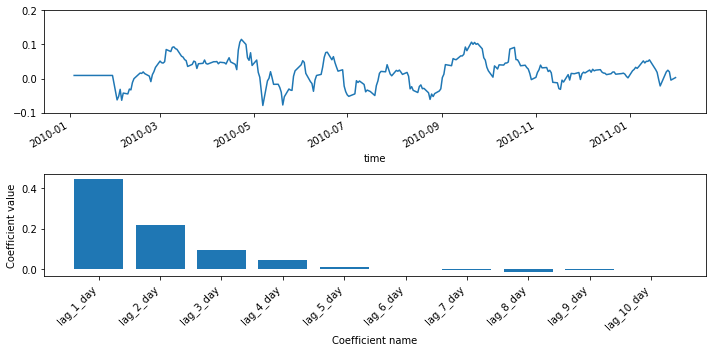

In [ ]:
# Visualize the output data up to "2011-01"
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
y.loc[:'2011-01'].plot(ax=axs[0], ylim=(-0.1, 0.2));

# Run the function to visualize model's coefficients
visualize_coefficients(model.coef_, prices_perc_shifted.columns, ax=axs[1]);

### Auto-regression with a smoother time series
Now, let's re-run the same procedure using a smoother signal. You'll use the same percent change algorithm as before, but this time use a much larger window (40 instead of 20). As the window grows, the difference between neighboring timepoints gets smaller, resulting in a smoother signal. What do you think this will do to the auto-regressive model?

In [ ]:
# Apply your custom function and plot
prices_perc = prices.rolling(40).apply(percent_change)

# Apply your preprocessing functino to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)

# Use a dictionary comprehension to create name: value pairs, one pair per shift
shifted_data = {"lag_{}_day".format(day_shift): 
                prices_perc['AAPL'].shift(day_shift) for day_shift in shifts}

# Convert into a DataFrame for subsequent use
prices_perc_shifted = pd.DataFrame(shifted_data)

# Replace missing values with the median for each column
X = prices_perc_shifted.fillna(np.nanmedian(prices_perc_shifted))
y = prices_perc['AAPL'].fillna(np.nanmedian(prices_perc['AAPL']))

# Fit the model
model = Ridge()
model.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

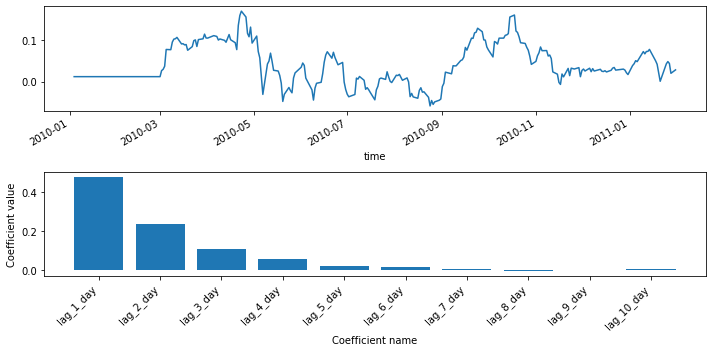

In [ ]:
# Visualize the output data up to "2011-01"
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
y.loc[:"2011-01"].plot(ax=axs[0])

# Run the function to visualize model's coefficients
visualize_coefficients(model.coef_, prices_perc_shifted.columns, ax=axs[1]);

As you can see here, by transforming your data with a larger window, you've also changed the relationship between each timepoint and the ones that come just before it. This model's coefficients gradually go down to zero, which means that the signal itself is smoother over time. Be careful when you see something like this, as it means your data is not i.i.d.

## Cross-validating time series data


### Cross-validation with shuffling
As you'll recall, cross-validation is the process of splitting your data into training and test sets multiple times. Each time you do this, you choose a different training and test set. In this exercise, you'll perform a traditional ```ShuffleSplit``` cross-validation on the company value data from earlier. Later we'll cover what changes need to be made for time series data. The data we'll use is the same historical price data for several large companies.

In [ ]:
X = pd.read_csv('./dataset/stock_10x.csv', index_col=0).to_numpy()
y = pd.read_csv('./dataset/stock_10y.csv', index_col=0).to_numpy()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()

In [ ]:
def visualize_predictions(results):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

    # Loop through our model results to visualize them
    for ii, (prediction, score, indices) in enumerate(results):
        # Plot the predictions of the model in the order they were generated
        offset = len(prediction) * ii
        axs[0].scatter(np.arange(len(prediction)) + offset, prediction, 
                       label='Iteration {}'.format(ii))

        # Plot the predictions of the model according to how time was ordered
        axs[1].scatter(indices, prediction)
    axs[0].legend(loc="best")
    axs[0].set(xlabel="Test prediction number", title="Predictions ordered by test prediction number")
    axs[1].set(xlabel="Time", title="Predictions ordered by time")

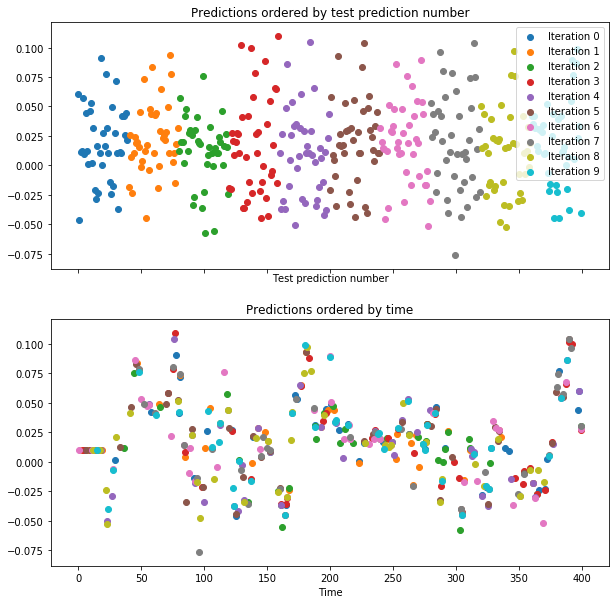

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, random_state=1)

# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    model.fit(X[tr], y[tr])
    
    # Generate predictions on the test data, score the predictions, and collect
    prediction = model.predict(X[tt])
    score = r2_score(y[tt], prediction)
    results.append((prediction, score, tt))
    
# Custom function to quickly visualize predictions
visualize_predictions(results)

If you look at the plot to the right, see that the order of datapoints in the test set is scrambled. Let's see how it looks when we shuffle the data in blocks.

### Cross-validation without shuffling
Now, re-run your model fit using block cross-validation (without shuffling all datapoints). In this case, neighboring time-points will be kept close to one another. How do you think the model predictions will look in each cross-validation loop?

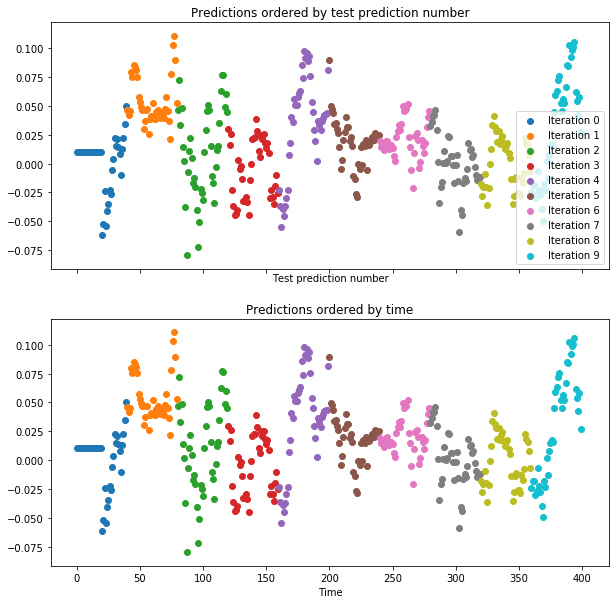

In [ ]:
# Create KFold cross-validation object
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=False)

# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    model.fit(X[tr], y[tr])
    
    # Generate predictions on the test data and collect
    prediction = model.predict(X[tt])
    results.append((prediction, _, tt))
    
# Custom function to quickly visualize predictions
visualize_predictions(results)

This time, the predictions generated within each CV loop look 'smoother' than they were before - they look more like a real time series because you didn't shuffle the data. This is a good sanity check to make sure your CV splits are correct.

### Time-based cross-validation
Finally, let's visualize the behavior of the time series cross-validation iterator in scikit-learn. Use this object to iterate through your data one last time, visualizing the training data used to fit the model on each iteration.

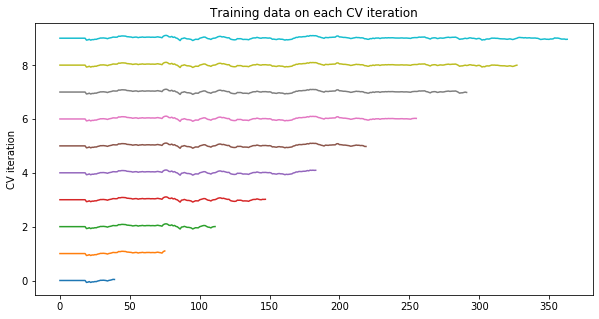

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# Create time-series cross-validation object
cv = TimeSeriesSplit(n_splits=10)

# Iterate through CV splits
fig, ax = plt.subplots()
for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Plot the training data on each iteration, to see the behavior of the CV
    ax.plot(tr, ii + y[tr]);
    
ax.set(title='Training data on each CV iteration', ylabel='CV iteration');

## Stationarity and stability
- Stationarity
    - Stationarity time series do not change their statistical properties over time
        - E.g. mean, standard deviation, trends
    - Most time series are non-stationary to some extent
- Model stability
    - Non-stationary data results in variability in our model
    - The statistical properties the model finds may change with the data
    - In addition, we will be less certain about the correct values of model parameters
    - How can we quantify this?
- Cross validation to quantify parameter stability
    - One approach: use cross-validation
    - Calculate model parameters on each iteration
    - Assess parameter stability across all CV splits
- Bootstrapping the mean
    - Bootstrapping is a common way to assess variability
    - The bootstrap:
        1. Take a random sample of data with replacement
        2. Calculate the mean of the sample
        3. Repeat this process many times (1000s)
        4. Calculate the percentiles of the result (usually 2.5, 97.5)
    - The result is a 95% confidence interval of the mean of each coefficient.
- Assessing model performance stability
    - If using the ```TimeSeriesSplit```, can plot the model's score over time
    - This is useful in finding certain regions of time that hurt the score
    - Also useful to find non-stationary signals

### Bootstrapping a confidence interval
A useful tool for assessing the variability of some data is the bootstrap. In this exercise, you'll write your own bootstrapping function that can be used to return a bootstrapped confidence interval.

This function takes three parameters: a 2-D array of numbers (```data```), a list of percentiles to calculate (```percentiles```), and the number of boostrap iterations to use (```n_boots```). It uses the resample function to generate a bootstrap sample, and then repeats this many times to calculate the confidence interval.

In [ ]:
from sklearn.utils import resample

def bootstrap_interval(data, percentiles=(2.5, 97.5), n_boots=100):
    """Bootstrap a confidence interval for the mean of columns of a 1- or 2-D dataset."""
    # Create our empty array we'll fill with the results
    if data.ndim == 1:
        data = data[:, np.newaxis]
        data = np.atleast_2d(data)
    bootstrap_means = np.zeros([n_boots, data.shape[-1]])
    for ii in range(n_boots):
        # Generate random indices for our data *with* replacement, then take the sample mean
        random_sample = resample(data)
        bootstrap_means[ii] = random_sample.mean(axis=0)

    # Compute the percentiles of choice for the bootstrapped means
    percentiles = np.percentile(bootstrap_means, percentiles, axis=0)
    return percentiles

### Calculating variability in model coefficients
In this lesson, you'll re-run the cross-validation routine used before, but this time paying attention to the model's stability over time. You'll investigate the coefficients of the model, as well as the uncertainty in its predictions.

Begin by assessing the stability (or uncertainty) of a model's coefficients across multiple CV splits. Remember, the coefficients are a reflection of the pattern that your model has found in the data.

In [ ]:
X = pd.read_csv('./dataset/stock_12x.csv', index_col=0).to_numpy()
y = pd.read_csv('./dataset/stock_12y.csv', index_col=0).to_numpy()

feature_names = np.array(['AAPL_lag_1_day', 'YHOO_lag_1_day', 'NVDA_lag_1_day', 'AAPL_lag_2_day',
       'YHOO_lag_2_day', 'NVDA_lag_2_day', 'AAPL_lag_3_day', 'YHOO_lag_3_day',
       'NVDA_lag_3_day', 'AAPL_lag_4_day', 'YHOO_lag_4_day', 'NVDA_lag_4_day'])

times_scores = pd.DatetimeIndex(['2010-04-05', '2010-04-28', '2010-05-21', '2010-06-16',
               '2010-07-12', '2010-08-04', '2010-08-27', '2010-09-22',
               '2010-10-15', '2010-11-09', '2010-12-03', '2010-12-29',
               '2011-01-24', '2011-02-16', '2011-03-14', '2011-04-06',
               '2011-05-02', '2011-05-25', '2011-06-20', '2011-07-14',
               '2011-08-08', '2011-08-31', '2011-09-26', '2011-10-19',
               '2011-11-11', '2011-12-07', '2012-01-03', '2012-01-27',
               '2012-02-22', '2012-03-16', '2012-04-11', '2012-05-04',
               '2012-05-30', '2012-06-22', '2012-07-18', '2012-08-10',
               '2012-09-05', '2012-09-28', '2012-10-23', '2012-11-19',
               '2012-12-13', '2013-01-09', '2013-02-04', '2013-02-28',
               '2013-03-25', '2013-04-18', '2013-05-13', '2013-06-06',
               '2013-07-01', '2013-07-25', '2013-08-19', '2013-09-12',
               '2013-10-07', '2013-10-30', '2013-11-22', '2013-12-18',
               '2014-01-14', '2014-02-07', '2014-03-05', '2014-03-28',
               '2014-04-23', '2014-05-16', '2014-06-11', '2014-07-07',
               '2014-07-30', '2014-08-22', '2014-09-17', '2014-10-10',
               '2014-11-04', '2014-11-28', '2014-12-23', '2015-01-20',
               '2015-02-12', '2015-03-10', '2015-04-02', '2015-04-28',
               '2015-05-21', '2015-06-16', '2015-07-10', '2015-08-04',
               '2015-08-27', '2015-09-22', '2015-10-15', '2015-11-09',
               '2015-12-03', '2015-12-29', '2016-01-25', '2016-02-18',
               '2016-03-14', '2016-04-07', '2016-05-02', '2016-05-25',
               '2016-06-20', '2016-07-14', '2016-08-08', '2016-08-31',
               '2016-09-26', '2016-10-19', '2016-11-11', '2016-12-07'], name='date')

model = LinearRegression()

In [ ]:
# Iterate through CV splits
n_splits = 100
cv = TimeSeriesSplit(n_splits)

# Create empty array to collect coefficients
coefficients = np.zeros([n_splits, X.shape[1]])

for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Fit the model on training data and collect the coefficients
    model.fit(X[tr], y[tr])
    coefficients[ii] = model.coef_

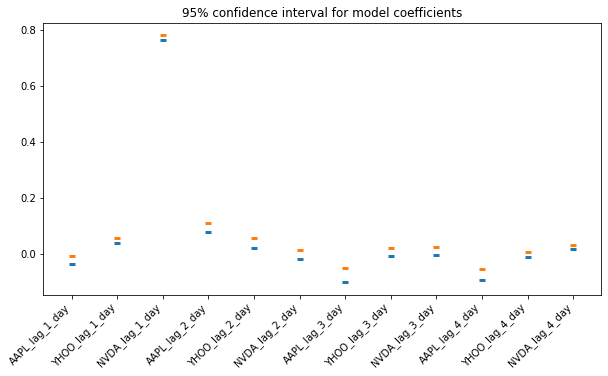

In [ ]:
# Calculate a confidence interval around each coefficient
bootstrapped_interval = bootstrap_interval(coefficients)

# Plot it
fig, ax = plt.subplots()
ax.scatter(feature_names, bootstrapped_interval[0], marker='_', lw=3);
ax.scatter(feature_names, bootstrapped_interval[1], marker='_', lw=3);
ax.set(title='95% confidence interval for model coefficients');
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

### Visualizing model score variability over time
Now that you've assessed the variability of each coefficient, let's do the same for the performance (scores) of the model. Recall that the ```TimeSeriesSplit``` object will use successively-later indices for each test set. This means that you can treat the scores of your validation as a time series. You can visualize this over time in order to see how the model's performance changes over time.

In [ ]:
def my_pearsonr(est, X, y):
    # Generate predictions and convert to a vector
    y_pred = est.predict(X).squeeze()
    
    # Use the numpy "corrcoef" function to calculate a correlation matrix
    my_corrcoef_matrix = np.corrcoef(y_pred, y.squeeze())
    
    # Return a single correlation value from the matrix
    my_corrcoef = my_corrcoef_matrix[1, 0]
    return my_corrcoef

In [ ]:
from sklearn.model_selection import cross_val_score
from functools import partial

# Generate scores for each split to see how the model performs over time
scores = cross_val_score(model, X, y, cv=cv, scoring=my_pearsonr)

# Convert to a Pandas Series object
scores_series = pd.Series(scores, index=times_scores, name='score')

# Bootstrap a rolling confidence interval for the mean score
scores_lo = scores_series.rolling(20).aggregate(partial(bootstrap_interval, percentiles=2.5))
scores_hi = scores_series.rolling(20).aggregate(partial(bootstrap_interval, percentiles=97.5))

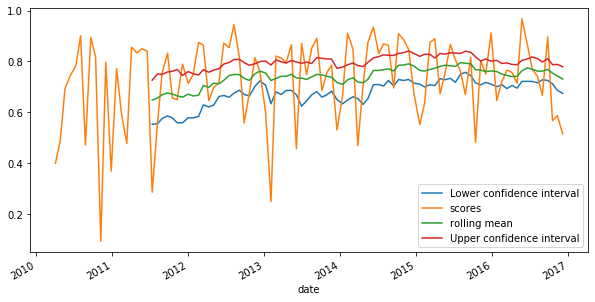

In [ ]:
# Plot the results
fig, ax = plt.subplots()
scores_lo.plot(ax=ax, label='Lower confidence interval');
scores_series.plot(ax=ax, label='scores')
scores_series.rolling(20).mean().plot(ax=ax, label='rolling mean')
scores_hi.plot(ax=ax, label='Upper confidence interval');
ax.legend();

### Accounting for non-stationarity
In this exercise, you will again visualize the variations in model scores, but now for data that changes its statistics over time.

In [ ]:
# Pre-initialize window sizes
window_sizes = [25, 50, 75, 100]

# Create an empty DataFrame to collect the stores
all_scores = pd.DataFrame(index=times_scores)

# Generate scores for each split to see how the model performs over time
for window in window_sizes:
    # Create cross-validation object using a limited lookback window
    cv = TimeSeriesSplit(n_splits=100, max_train_size=window)
    
    # Calculate scores across all CV splits and collect them in a DataFrame
    this_scores = cross_val_score(model, X, y, cv=cv, scoring=my_pearsonr)
    all_scores['Length {}'.format(window)] = this_scores

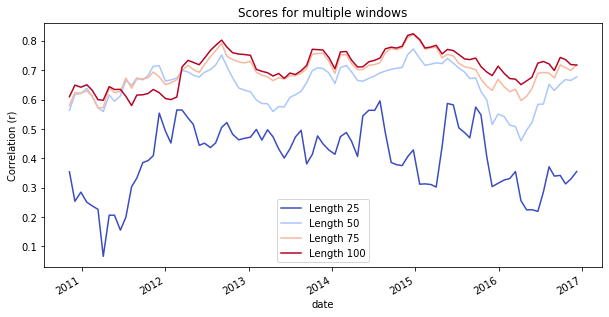

In [ ]:
# Visualize the scores
ax = all_scores.rolling(10).mean().plot(cmap=plt.cm.coolwarm);
ax.set(title='Scores for multiple windows', ylabel='Correlation (r)');

## Wrap-up
- Timeseries and machine learning
    - Many applications of time series + machine learning
    - Always visualize your data first
- Feature extraction and classification
    - Summary statistics for time series classification
    - Combining multiple features into a single input matrix
    - Feature extraction for time series data
- Model fitting and improving data quality
    - Time series features for regression
    - Generating predictions over time
    - Cleaning and improving time series data
- Validating and assessing our model performance
    - Cross-validation with time series data (don't shuffle the data!)
    - Time series stationary
    - Assessing model coefficient and score stability
- Advanced concepts in time series
    - Advanced window functions
    - Signal processing and filtering details
    - Spectral Analysis
- Advanced machine learning
    - Advanced time series feature extraction (e.g., ```tsfresh```)
    - More complex model architectures for regression and classification
    - Production-ready pipelines for time series analysis
    